In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import re

## Large Lyrics Data

In [2]:
df = pd.read_csv('cleaned_lyrics_years.csv')
df[:5]

year    genre                                             lyrics  length  \
0  2006     Rock  she is the queen ,  oh yeah ,  alright long li...     258   
1  2016     Rock  there's an echo pulling out the meaning rescui...     413   
2  2006     Rock  i am lying down with my feet crossed in bed it...     311   
3  2007    Metal  exultancy of memory shows up eternal fear deep...      94   
4  2009  Country  shes with me i proudly tell the maitre de as w...     274   

                                          normalized  
0  ['queen', 'oh', 'yes', 'alright', 'long', 'liv...  
1  ['echo', 'pull', 'mean', 'rescue', 'nightmare'...  
2  ['lie', 'foot', 'cross', 'bed', 'fuzzy', 'head...  
3  ['exultancy', 'memory', 'show', 'eternal', 'fe...  
4  ['s', 'proudly', 'tell', 'maitre', 'de', 'arri...

In [ ]:
import ast
df['normalized'] = df['normalized'].apply(lambda x:ast.literal_eval(x))
df['normalized'][0]

In [69]:
df_groups = df.groupby(['year','genre'])
stats_df = pd.DataFrame(index=sorted(pd.unique(df['year'])),columns=pd.unique(df['genre']))
for index, songs in list(df_groups):
    y = index[0]
    g = index[1]
    stats_df.loc[y,g] = len(songs)
stats_df

Rock Metal Country Hip-Hop Electronic   Pop Folk Indie  Jazz  R&B
1970     96   NaN       3     NaN        NaN     4  NaN   NaN    20   12
1971    100   NaN       2     NaN        NaN    32  NaN   NaN    13   19
1972     67   NaN     NaN     NaN        NaN    14  NaN   NaN    42   25
1973    176   NaN      10     NaN        NaN    16  NaN   NaN    16    6
1974    102   NaN      15     NaN        NaN     3  NaN   NaN    11    4
1975     60   NaN      21     NaN        NaN     9   10   NaN    13  NaN
1976     53   NaN     NaN     NaN        NaN     2  NaN   NaN     5    2
1977    126   NaN       7     NaN        NaN    51  NaN   NaN    11    1
1978     80   NaN      13     NaN          6    34  NaN   NaN    18    1
1979    107   NaN       8     NaN          6    23  NaN   NaN    10    1
1980    130   NaN     NaN     NaN        NaN    18  NaN   NaN    27    8
1981     74   NaN       2     NaN        NaN    58  NaN   NaN     9    1
1982    140   NaN       5       2        NaN    19  NaN   NaN     9    6
1983    101   NaN     NaN     NaN        NaN    15  NaN   NaN    12  NaN
1984     89     8     NaN     NaN         11    44  NaN   NaN     4  NaN
1985     91    10     NaN     NaN          3     8  NaN   NaN   NaN   38
1986     95    22      10     NaN          1    21  NaN   NaN    11   14
1987     66    19      10     NaN          9   NaN  NaN   NaN     1  NaN
1988     81     7       2     NaN        NaN    51  NaN   NaN    10    5
1989    129    12     NaN      16        NaN     7  NaN   NaN    14    1
1990    710    15      64       5        NaN    97  NaN   NaN    56   18
1991    102     7      18      11          1    10   11   NaN    48   35
1992    280    22      40      39          4    22   12   NaN    10   30
1993    237    33      23      10         31    47  NaN   NaN    63   40
1994    233    21      10      21          6   106    4   NaN    22   32
1995    259    25      19      44         21    87   27   NaN    65   24
1996    333    28      39      56          3    60   12   NaN    67  NaN
1997    411    10      50      11         19    42  NaN   NaN    68   14
1998    395    24      32      19         19    88    6   NaN    28  NaN
1999    388    35      48      68          1   160    2   NaN    41   19
2000    588    86      32      37         25    96  NaN     1    41   44
2001    392    85      97      49         31   250    9     7    75   34
2002    606    30      19     114         21   351   15     4    67    3
2003    815    53     110      50         28   254  NaN    20    84   39
2004   1026    94     129     195         46   377    3     3   120    5
2005   2093   141     257     272        130   512   27    33   189   52
2006  29903  4689    2089    2601       1394  9350  408   147  1013  744
2007  25188  9313    6172    1779        779  4747  289   426  1060  438
2008   6870   417    1463     907        429  2355  141   361   669  407
2009   3409   432     322     788        240  1663   59   115   214   67
2010   3062   573     348     913        329  1461   84   149   277   46
2011   2328   538     269     945        343  1667   50   226   203   83
2012   2693   507     282     965        261  1579  162   211   247   63
2013   2196   504     467     697        424  1468   79   211   329  133
2014   3260   492     523     681        463  1860   88   347   588  165
2015   1972   385     382     640        361  1314   65   298   356  243
2016   2174   431     404     826        369  1212   78   232   515  207

In [70]:
len(df)

191341

## Billboard Dataset

In [2]:
billboard_df = pd.read_csv('cleaned_billboard.csv')
billboard_df

Rank                                      Song  \
0        1                               wooly bully   
1        2  i cant help myself sugar pie honey bunch   
2        3                i cant get no satisfaction   
3        4                       you were on my mind   
4        5              youve lost that lovin feelin   
...    ...                                       ...   
5063    96                                 el perdon   
5064    97                                 she knows   
5065    98                             night changes   
5066    99                              back to back   
5067   100                     how deep is your love   

                              Artist  Year  \
0      sam the sham and the pharaohs  1965   
1                          four tops  1965   
2                 the rolling stones  1965   
3                            we five  1965   
4             the righteous brothers  1965   
...                              ...   ...   
5063  nicky jam and enrique iglesias  2015   
5064          neyo featuring juicy j  2015   
5065                   one direction  2015   
5066                           drake  2015   
5067     calvin harris and disciples  2015   

                                                 Lyrics  Language  \
0     uno dos one two tres quatro matty told hatty a...         1   
1     sugar pie honey bunch you know that i love you...         1   
2     i can't get no satisfaction i can't get me no ...         1   
3     when i woke up this morning you were on my min...         1   
4     you never close your eyes anymore when i kiss ...         1   
...                                                 ...       ...   
5063  dime si es ver dad me dijon que te estes casa ...         0   
5064  yeah uhuh your boy juicy j she bad yeah in cas...         1   
5065  going out tonight changes into something red h...         1   
5066  oh man oh man oh man not again yeah i learned ...         1   
5067  i want you to breathe me in let me be your air...         1   

                                                 Tokens  \
0     ['uno', 'dos', 'one', 'two', 'tres', 'quatro',...   
1     ['sugar', 'pie', 'honey', 'bunch', 'you', 'kno...   
2     ['i', 'ca', "n't", 'get', 'no', 'satisfaction'...   
3     ['when', 'i', 'woke', 'up', 'this', 'morning',...   
4     ['you', 'never', 'close', 'your', 'eyes', 'any...   
...                                                 ...   
5063  ['dime', 'si', 'es', 'ver', 'dad', 'me', 'dijo...   
5064  ['yeah', 'uhuh', 'your', 'boy', 'juicy', 'j', ...   
5065  ['going', 'out', 'tonight', 'changes', 'into',...   
5066  ['oh', 'man', 'oh', 'man', 'oh', 'man', 'not',...   
5067  ['i', 'want', 'you', 'to', 'breathe', 'me', 'i...   

                                             Normalized  
0     ['uno', 'dos', 'tres', 'quatro', 'matty', 'tel...  
1     ['sugar', 'pie', 'honey', 'bunch', 'know', 'lo...  
2     ['satisfaction', 'satisfaction', 'try', 'try',...  
3     ['wake', 'morning', 'mind', 'mind', 'trouble',...  
4     ['close', 'eye', 'anymore', 'kiss', 'lip', 'te...  
...                                                 ...  
5063  ['dime', 'si', 'es', 'ver', 'dad', 'dijon', 'q...  
5064  ['yes', 'uhuh', 'boy', 'juicy', 'bad', 'yes', ...  
5065  ['tonight', 'change', 'red', 'mother', 'like',...  
5066  ['oh', 'man', 'oh', 'man', 'oh', 'man', 'yes',...  
5067  ['want', 'breathe', 'let', 'air', 'let', 'roam...  

[5068 rows x 8 columns]

In [3]:
en_billboard_df = billboard_df.loc[billboard_df['Language']==1]
pd.unique(en_billboard_df['Language'])

array([1], dtype=int64)

In [5]:
en_billboard_df.to_csv('en_billboard_df.csv',index=None)

## Socio-economic Index
the issues of multicollinearity and subjectivity of the choice of the indexes

In [4]:
# socio-economic index
ghtm = pd.read_csv('GHTM.csv')
ghtm

year  unemployment rate  disposable income change  CPI change  birth rate  \
0   1965              0.040                    0.0412      0.0161      19.660   
1   1966              0.038                    0.0325      0.0286      18.984   
2   1967              0.038                    0.0351      0.0309      18.308   
3   1968              0.034                    0.0237      0.0419      17.632   
4   1969              0.035                    0.0342      0.0546      17.232   
5   1970              0.061                    0.0332      0.0572      16.832   
6   1971              0.060                    0.0369      0.0438      16.431   
7   1972              0.052                    0.0520      0.0321      16.031   
8   1973              0.049                   -0.0201      0.0622      15.631   
9   1974              0.072                    0.0147      0.1104      15.456   
10  1975              0.082                    0.0220      0.0913      15.281   
11  1976              0.078                    0.0212      0.0576      15.106   
12  1977              0.064                    0.0346      0.0650      14.931   
13  1978              0.060                    0.0083      0.0759      14.756   
14  1979              0.060                   -0.0044      0.1135      14.871   
15  1980              0.072                    0.0142      0.1350      14.986   
16  1981              0.085                    0.0124      0.1032      15.102   
17  1982              0.108                    0.0251      0.0616      15.217   
18  1983              0.083                    0.0593      0.0321      15.332   
19  1984              0.073                    0.0210      0.0432      15.396   
20  1985              0.070                    0.0286      0.0356      15.461   
21  1986              0.066                    0.0130      0.0186      15.525   
22  1987              0.057                    0.0376      0.0365      15.590   
23  1988              0.053                    0.0196      0.0414      15.654   
24  1989              0.054                    0.0083      0.0482      15.613   
25  1990              0.063                   -0.0061      0.0540      15.573   
26  1991              0.073                    0.0279      0.0421      15.532   
27  1992              0.074                    0.0034      0.0301      15.492   
28  1993              0.065                    0.0150      0.0299      15.451   
29  1994              0.055                    0.0211      0.0256      15.217   
30  1995              0.056                    0.0198      0.0283      14.983   
31  1996              0.054                    0.0243      0.0295      14.750   
32  1997              0.047                    0.0465      0.0229      14.516   
33  1998              0.044                    0.0209      0.0156      14.282   
34  1999              0.040                    0.0388      0.0221      14.232   
35  2000              0.039                    0.0173      0.0336      14.182   
36  2001              0.057                    0.0205      0.0285      14.133   
37  2002              0.060                    0.0171      0.0158      14.083   
38  2003              0.057                    0.0241      0.0228      14.033   
39  2004              0.054                    0.0062      0.0266      13.989   
40  2005              0.049                    0.0300      0.0339      13.945   
41  2006              0.044                    0.0132      0.0323      13.900   
42  2007              0.050                    0.0002      0.0283      13.856   
43  2008              0.073                   -0.0104      0.0386      13.812   
44  2009              0.099                    0.0115     -0.0036      13.558   
45  2010              0.093                    0.0162      0.0164      13.305   
46  2011              0.085                    0.0259      0.0316      13.051   
47  2012              0.079                   -0.0196      0.0207      12.798   
48  2013              0.067        

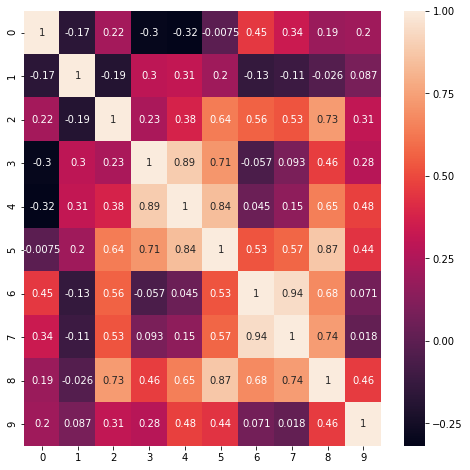

In [5]:
# linearity test
plt.rcParams['figure.figsize']=[8,8]
import seaborn as sns
import scipy as sp
M = []
for a in ghtm.columns[1:]:
    L = []
    for b in ghtm.columns[1:]:
        L.append(sp.stats.pearsonr(ghtm[a],ghtm[b])[0])
    M.append(L)
sns.heatmap(np.array(M),annot=True)

In [6]:
from sklearn.preprocessing import StandardScaler
st_ghtm = pd.DataFrame(index=ghtm['year'])
for c in ghtm.columns:
    if c != 'year':
        st_ghtm[c] = StandardScaler().fit_transform(ghtm[c].values.reshape(-1,1))
st_ghtm

unemployment rate  disposable income change  CPI change  birth rate  \
year                                                                        
1965          -1.275828                  1.291719   -0.868540    3.043823   
1966          -1.397113                  0.747711   -0.423836    2.603769   
1967          -1.397113                  0.910288   -0.342011    2.163715   
1968          -1.639684                  0.197449    0.049328    1.723661   
1969          -1.579041                  0.854011    0.501146    1.463274   
1970          -0.002332                  0.791481    0.593645    1.202887   
1971          -0.062975                  1.022841    0.116923    0.941849   
1972          -0.548116                  1.967039   -0.299320    0.681463   
1973          -0.730044                 -2.541350    0.771526    0.421076   
1974           0.664737                 -0.365318    2.486302    0.307156   
1975           1.271163                  0.091149    1.806795    0.193237   
1976           1.028593                  0.041125    0.607875    0.079318   
1977           0.179596                  0.879023    0.871140   -0.034601   
1978          -0.062975                 -0.765508    1.258921   -0.148521   
1979          -0.062975                 -1.559634    2.596588   -0.073659   
1980           0.664737                 -0.396582    3.361478    0.001202   
1981           1.453091                 -0.509136    2.230153    0.076714   
1982           2.847872                  0.284991    0.750180    0.151575   
1983           1.331806                  2.423506   -0.299320    0.226436   
1984           0.725379                  0.028619    0.095577    0.268098   
1985           0.543451                  0.503845   -0.174803    0.310411   
1986           0.300881                 -0.471618   -0.779599    0.352073   
1987          -0.244903                  1.066612   -0.142784    0.394386   
1988          -0.487474                 -0.058922    0.031540    0.436048   
1989          -0.426831                 -0.765508    0.273458    0.409358   
1990           0.118953                 -1.665935    0.479801    0.383320   
1991           0.725379                  0.460074    0.056443    0.356630   
1992           0.786022                 -1.071903   -0.370472    0.330591   
1993           0.240238                 -0.346559   -0.377587    0.303902   
1994          -0.366188                  0.034872   -0.530565    0.151575   
1995          -0.305546                 -0.046416   -0.434509   -0.000751   
1996          -0.426831                  0.234967   -0.391818   -0.152426   
1997          -0.851329                  1.623126   -0.626621   -0.304753   
1998          -1.033257                  0.022366   -0.886328   -0.457079   
1999          -1.275828                  1.141648   -0.655082   -0.489628   
2000          -1.336471                 -0.202740   -0.245955   -0.522176   
2001          -0.244903                 -0.002645   -0.427394   -0.554073   
2002          -0.062975                 -0.215246   -0.879213   -0.586622   
2003          -0.244903                  0.222461   -0.630179   -0.619170   
2004          -0.426831                 -0.896820   -0.494989   -0.647813   
2005          -0.730044                  0.591386   -0.235282   -0.676455   
2006          -1.033257                 -0.459112   -0.292204   -0.705749   
2007          -0.669402                 -1.271998   -0.434509   -0.734391   
2008           0.725379                 -1.934813   -0.068074   -0.763034   
2009           2.302088                 -0.565413   -1.569392   -0.928379   
2010           1.938232                 -0.271523   -0.857867   -1.093074   
2011           1.453091                  0.335015   -0.317108   -1.258420   
2012           1.089235                 -2.510086   -0.704889   -1.423115   
2013           0.361523                  0.810240   -0.921904   -1.588460   
2014          -0.305546                  0.822746   -0.864982   -1.663322   
20

In [7]:
st_ghtm = st_ghtm.drop(columns='crime rate')

In [8]:
st_ghtm['GHTM'] = (st_ghtm['unemployment rate'] - st_ghtm['disposable income change'] - st_ghtm['CPI change'] - st_ghtm['birth rate'] - \
                   st_ghtm['marriage rate'] + st_ghtm['divorce rate'] + st_ghtm['death rate'] + st_ghtm['homicide rate'] + \
                   + st_ghtm['suicide rate'])/9
st_ghtm

unemployment rate  disposable income change  CPI change  birth rate  \
year                                                                        
1965          -1.275828                  1.291719   -0.868540    3.043823   
1966          -1.397113                  0.747711   -0.423836    2.603769   
1967          -1.397113                  0.910288   -0.342011    2.163715   
1968          -1.639684                  0.197449    0.049328    1.723661   
1969          -1.579041                  0.854011    0.501146    1.463274   
1970          -0.002332                  0.791481    0.593645    1.202887   
1971          -0.062975                  1.022841    0.116923    0.941849   
1972          -0.548116                  1.967039   -0.299320    0.681463   
1973          -0.730044                 -2.541350    0.771526    0.421076   
1974           0.664737                 -0.365318    2.486302    0.307156   
1975           1.271163                  0.091149    1.806795    0.193237   
1976           1.028593                  0.041125    0.607875    0.079318   
1977           0.179596                  0.879023    0.871140   -0.034601   
1978          -0.062975                 -0.765508    1.258921   -0.148521   
1979          -0.062975                 -1.559634    2.596588   -0.073659   
1980           0.664737                 -0.396582    3.361478    0.001202   
1981           1.453091                 -0.509136    2.230153    0.076714   
1982           2.847872                  0.284991    0.750180    0.151575   
1983           1.331806                  2.423506   -0.299320    0.226436   
1984           0.725379                  0.028619    0.095577    0.268098   
1985           0.543451                  0.503845   -0.174803    0.310411   
1986           0.300881                 -0.471618   -0.779599    0.352073   
1987          -0.244903                  1.066612   -0.142784    0.394386   
1988          -0.487474                 -0.058922    0.031540    0.436048   
1989          -0.426831                 -0.765508    0.273458    0.409358   
1990           0.118953                 -1.665935    0.479801    0.383320   
1991           0.725379                  0.460074    0.056443    0.356630   
1992           0.786022                 -1.071903   -0.370472    0.330591   
1993           0.240238                 -0.346559   -0.377587    0.303902   
1994          -0.366188                  0.034872   -0.530565    0.151575   
1995          -0.305546                 -0.046416   -0.434509   -0.000751   
1996          -0.426831                  0.234967   -0.391818   -0.152426   
1997          -0.851329                  1.623126   -0.626621   -0.304753   
1998          -1.033257                  0.022366   -0.886328   -0.457079   
1999          -1.275828                  1.141648   -0.655082   -0.489628   
2000          -1.336471                 -0.202740   -0.245955   -0.522176   
2001          -0.244903                 -0.002645   -0.427394   -0.554073   
2002          -0.062975                 -0.215246   -0.879213   -0.586622   
2003          -0.244903                  0.222461   -0.630179   -0.619170   
2004          -0.426831                 -0.896820   -0.494989   -0.647813   
2005          -0.730044                  0.591386   -0.235282   -0.676455   
2006          -1.033257                 -0.459112   -0.292204   -0.705749   
2007          -0.669402                 -1.271998   -0.434509   -0.734391   
2008           0.725379                 -1.934813   -0.068074   -0.763034   
2009           2.302088                 -0.565413   -1.569392   -0.928379   
2010           1.938232                 -0.271523   -0.857867   -1.093074   
2011           1.453091                  0.335015   -0.317108   -1.258420   
2012           1.089235                 -2.510086   -0.704889   -1.423115   
2013           0.361523                  0.810240   -0.921904   -1.588460   
2014          -0.305546                  0.822746   -0.864982   -1.663322   
20

In [9]:
st_ghtm['GHTM'] = StandardScaler().fit_transform(st_ghtm['GHTM'].values.reshape(-1,1)).reshape(52,)

In [10]:
st_ghtm.to_csv('st_ghtm_homicide_suicide.csv')

### Genre Relationships

In [6]:
import gensim
lyrics_tuples = [(row['normalized'],[index,str(row['year']),row['genre']]) for index,row in df.iterrows()]
lyrics_tuples[0]

(['queen',
  'oh',
  'yes',
  'alright',
  'long',
  'live',
  'queen',
  'oh',
  'yes',
  'alright',
  'be',
  'tricky',
  'be',
  'dumb',
  'be',
  'filter',
  'queen',
  'suck',
  'scum',
  'little',
  'salt',
  'pepper',
  'baby',
  'little',
  'salt',
  'pepper',
  'let',
  'little',
  'baby',
  'play',
  'little',
  'trick',
  'tell',
  'stupid',
  'lie',
  'have',
  'spend',
  'time',
  'filter',
  'queen',
  'bake',
  'apple',
  'pie',
  'little',
  'salt',
  'pepper',
  'baby',
  'little',
  'salt',
  'pepper',
  'let',
  'little',
  'baby',
  'queen',
  'oh',
  'yes',
  'alright',
  'long',
  'live',
  'queen',
  'oh',
  'yes',
  'alright',
  'like',
  'smell',
  'upholstery',
  'like',
  'polish',
  'hood',
  'flip',
  'switch',
  'filter',
  'queen',
  'good',
  'little',
  'salt',
  'pepper',
  'baby',
  'little',
  'salt',
  'pepper',
  'let',
  'little',
  'baby',
  'queen',
  'oh',
  'yes',
  'alright',
  'long',
  'live',
  'queen',
  'oh',
  'yes',
  'alright',
  'lit

In [7]:
from multiprocessing import Pool
p = Pool()
tagged_lyrics = p.starmap(gensim.models.doc2vec.TaggedDocument, lyrics_tuples)
tagged_lyrics[0]

TaggedDocument(words=['queen', 'oh', 'yes', 'alright', 'long', 'live', 'queen', 'oh', 'yes', 'alright', 'be', 'tricky', 'be', 'dumb', 'be', 'filter', 'queen', 'suck', 'scum', 'little', 'salt', 'pepper', 'baby', 'little', 'salt', 'pepper', 'let', 'little', 'baby', 'play', 'little', 'trick', 'tell', 'stupid', 'lie', 'have', 'spend', 'time', 'filter', 'queen', 'bake', 'apple', 'pie', 'little', 'salt', 'pepper', 'baby', 'little', 'salt', 'pepper', 'let', 'little', 'baby', 'queen', 'oh', 'yes', 'alright', 'long', 'live', 'queen', 'oh', 'yes', 'alright', 'like', 'smell', 'upholstery', 'like', 'polish', 'hood', 'flip', 'switch', 'filter', 'queen', 'good', 'little', 'salt', 'pepper', 'baby', 'little', 'salt', 'pepper', 'let', 'little', 'baby', 'queen', 'oh', 'yes', 'alright', 'long', 'live', 'queen', 'oh', 'yes', 'alright', 'little', 'salt', 'pepper', 'baby', 'little', 'salt', 'pepper', 'let', 'little', 'baby'], tags=[0, '2006', 'Rock'])

In [8]:
full_D2V_model = gensim.models.doc2vec.Doc2Vec(tagged_lyrics, min_count = 10, vector_size = 50,seed = 0, epochs=10, workers=30)

In [9]:
full_D2V_model.save('full_50.mm')

In [97]:
relations = []
for i,v in full_D2V_model.docvecs.most_similar(positive=['Pop'],negative=['Country'],topn=len(df)):
    if i in stats_df.columns:
        relations.append((i,v))
relations

[('Electronic', 0.6066583395004272),
 ('Hip-Hop', 0.4333975911140442),
 ('Metal', 0.12645000219345093),
 ('R&B', 0.04692966863512993),
 ('Indie', -0.06247358024120331),
 ('Rock', -0.1385897994041443),
 ('Jazz', -0.20174476504325867),
 ('Folk', -0.22111012041568756)]

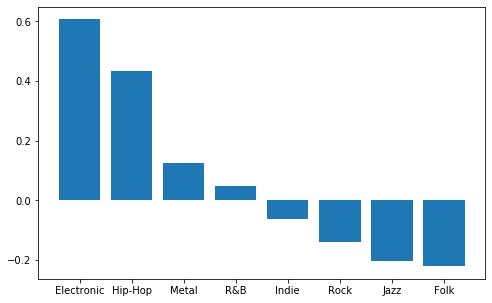

In [12]:
plt.rcParams['figure.figsize'] = [8,5]
plt.bar([x[0] for x in relations],height=[x[1] for x in relations])
plt.savefig('Pictures/genre_relationship')

### Study 1 -- Frequency of love

In [11]:
st_ghtm = pd.read_csv('st_ghtm_homicide_suicide.csv')
st_ghtm

year  unemployment rate  disposable income change  CPI change  birth rate  \
0   1965          -1.275828                  1.291719   -0.868540    3.043823   
1   1966          -1.397113                  0.747711   -0.423836    2.603769   
2   1967          -1.397113                  0.910288   -0.342011    2.163715   
3   1968          -1.639684                  0.197449    0.049328    1.723661   
4   1969          -1.579041                  0.854011    0.501146    1.463274   
5   1970          -0.002332                  0.791481    0.593645    1.202887   
6   1971          -0.062975                  1.022841    0.116923    0.941849   
7   1972          -0.548116                  1.967039   -0.299320    0.681463   
8   1973          -0.730044                 -2.541350    0.771526    0.421076   
9   1974           0.664737                 -0.365318    2.486302    0.307156   
10  1975           1.271163                  0.091149    1.806795    0.193237   
11  1976           1.028593                  0.041125    0.607875    0.079318   
12  1977           0.179596                  0.879023    0.871140   -0.034601   
13  1978          -0.062975                 -0.765508    1.258921   -0.148521   
14  1979          -0.062975                 -1.559634    2.596588   -0.073659   
15  1980           0.664737                 -0.396582    3.361478    0.001202   
16  1981           1.453091                 -0.509136    2.230153    0.076714   
17  1982           2.847872                  0.284991    0.750180    0.151575   
18  1983           1.331806                  2.423506   -0.299320    0.226436   
19  1984           0.725379                  0.028619    0.095577    0.268098   
20  1985           0.543451                  0.503845   -0.174803    0.310411   
21  1986           0.300881                 -0.471618   -0.779599    0.352073   
22  1987          -0.244903                  1.066612   -0.142784    0.394386   
23  1988          -0.487474                 -0.058922    0.031540    0.436048   
24  1989          -0.426831                 -0.765508    0.273458    0.409358   
25  1990           0.118953                 -1.665935    0.479801    0.383320   
26  1991           0.725379                  0.460074    0.056443    0.356630   
27  1992           0.786022                 -1.071903   -0.370472    0.330591   
28  1993           0.240238                 -0.346559   -0.377587    0.303902   
29  1994          -0.366188                  0.034872   -0.530565    0.151575   
30  1995          -0.305546                 -0.046416   -0.434509   -0.000751   
31  1996          -0.426831                  0.234967   -0.391818   -0.152426   
32  1997          -0.851329                  1.623126   -0.626621   -0.304753   
33  1998          -1.033257                  0.022366   -0.886328   -0.457079   
34  1999          -1.275828                  1.141648   -0.655082   -0.489628   
35  2000          -1.336471                 -0.202740   -0.245955   -0.522176   
36  2001          -0.244903                 -0.002645   -0.427394   -0.554073   
37  2002          -0.062975                 -0.215246   -0.879213   -0.586622   
38  2003          -0.244903                  0.222461   -0.630179   -0.619170   
39  2004          -0.426831                 -0.896820   -0.494989   -0.647813   
40  2005          -0.730044                  0.591386   -0.235282   -0.676455   
41  2006          -1.033257                 -0.459112   -0.292204   -0.705749   
42  2007          -0.669402                 -1.271998   -0.434509   -0.734391   
43  2008           0.725379                 -1.934813   -0.068074   -0.763034   
44  2009           2.302088                 -0.565413   -1.569392   -0.928379   
45  2010           1.938232                 -0.271523   -0.857867   -1.093074   
46  2011           1.453091                  0.335015   -0.317108   -1.258420   
47  2012           1.089235                 -2.510086   -0.704889   -1.423115   
48  2013           0.361523        

In [12]:
st_ghtm = st_ghtm.loc[:50]
st_ghtm

year  unemployment rate  disposable income change  CPI change  birth rate  \
0   1965          -1.275828                  1.291719   -0.868540    3.043823   
1   1966          -1.397113                  0.747711   -0.423836    2.603769   
2   1967          -1.397113                  0.910288   -0.342011    2.163715   
3   1968          -1.639684                  0.197449    0.049328    1.723661   
4   1969          -1.579041                  0.854011    0.501146    1.463274   
5   1970          -0.002332                  0.791481    0.593645    1.202887   
6   1971          -0.062975                  1.022841    0.116923    0.941849   
7   1972          -0.548116                  1.967039   -0.299320    0.681463   
8   1973          -0.730044                 -2.541350    0.771526    0.421076   
9   1974           0.664737                 -0.365318    2.486302    0.307156   
10  1975           1.271163                  0.091149    1.806795    0.193237   
11  1976           1.028593                  0.041125    0.607875    0.079318   
12  1977           0.179596                  0.879023    0.871140   -0.034601   
13  1978          -0.062975                 -0.765508    1.258921   -0.148521   
14  1979          -0.062975                 -1.559634    2.596588   -0.073659   
15  1980           0.664737                 -0.396582    3.361478    0.001202   
16  1981           1.453091                 -0.509136    2.230153    0.076714   
17  1982           2.847872                  0.284991    0.750180    0.151575   
18  1983           1.331806                  2.423506   -0.299320    0.226436   
19  1984           0.725379                  0.028619    0.095577    0.268098   
20  1985           0.543451                  0.503845   -0.174803    0.310411   
21  1986           0.300881                 -0.471618   -0.779599    0.352073   
22  1987          -0.244903                  1.066612   -0.142784    0.394386   
23  1988          -0.487474                 -0.058922    0.031540    0.436048   
24  1989          -0.426831                 -0.765508    0.273458    0.409358   
25  1990           0.118953                 -1.665935    0.479801    0.383320   
26  1991           0.725379                  0.460074    0.056443    0.356630   
27  1992           0.786022                 -1.071903   -0.370472    0.330591   
28  1993           0.240238                 -0.346559   -0.377587    0.303902   
29  1994          -0.366188                  0.034872   -0.530565    0.151575   
30  1995          -0.305546                 -0.046416   -0.434509   -0.000751   
31  1996          -0.426831                  0.234967   -0.391818   -0.152426   
32  1997          -0.851329                  1.623126   -0.626621   -0.304753   
33  1998          -1.033257                  0.022366   -0.886328   -0.457079   
34  1999          -1.275828                  1.141648   -0.655082   -0.489628   
35  2000          -1.336471                 -0.202740   -0.245955   -0.522176   
36  2001          -0.244903                 -0.002645   -0.427394   -0.554073   
37  2002          -0.062975                 -0.215246   -0.879213   -0.586622   
38  2003          -0.244903                  0.222461   -0.630179   -0.619170   
39  2004          -0.426831                 -0.896820   -0.494989   -0.647813   
40  2005          -0.730044                  0.591386   -0.235282   -0.676455   
41  2006          -1.033257                 -0.459112   -0.292204   -0.705749   
42  2007          -0.669402                 -1.271998   -0.434509   -0.734391   
43  2008           0.725379                 -1.934813   -0.068074   -0.763034   
44  2009           2.302088                 -0.565413   -1.569392   -0.928379   
45  2010           1.938232                 -0.271523   -0.857867   -1.093074   
46  2011           1.453091                  0.335015   -0.317108   -1.258420   
47  2012           1.089235                 -2.510086   -0.704889   -1.423115   
48  2013           0.361523        

In [13]:
en_billboard_df = pd.read_csv('en_billboard_df.csv')
en_billboard_df

Rank                                      Song  \
0        1                               wooly bully   
1        2  i cant help myself sugar pie honey bunch   
2        3                i cant get no satisfaction   
3        4                       you were on my mind   
4        5              youve lost that lovin feelin   
...    ...                                       ...   
5050    95                                     waves   
5051    97                                 she knows   
5052    98                             night changes   
5053    99                              back to back   
5054   100                     how deep is your love   

                             Artist  Year  \
0     sam the sham and the pharaohs  1965   
1                         four tops  1965   
2                the rolling stones  1965   
3                           we five  1965   
4            the righteous brothers  1965   
...                             ...   ...   
5050                       mr probz  2015   
5051         neyo featuring juicy j  2015   
5052                  one direction  2015   
5053                          drake  2015   
5054    calvin harris and disciples  2015   

                                                 Lyrics  Language  \
0     uno dos one two tres quatro matty told hatty a...         1   
1     sugar pie honey bunch you know that i love you...         1   
2     i can't get no satisfaction i can't get me no ...         1   
3     when i woke up this morning you were on my min...         1   
4     you never close your eyes anymore when i kiss ...         1   
...                                                 ...       ...   
5050  my face above the water my feet can't touch th...         1   
5051  yeah uhuh your boy juicy j she bad yeah in cas...         1   
5052  going out tonight changes into something red h...         1   
5053  oh man oh man oh man not again yeah i learned ...         1   
5054  i want you to breathe me in let me be your air...         1   

                                                 Tokens  \
0     ['uno', 'dos', 'one', 'two', 'tres', 'quatro',...   
1     ['sugar', 'pie', 'honey', 'bunch', 'you', 'kno...   
2     ['i', 'ca', "n't", 'get', 'no', 'satisfaction'...   
3     ['when', 'i', 'woke', 'up', 'this', 'morning',...   
4     ['you', 'never', 'close', 'your', 'eyes', 'any...   
...                                                 ...   
5050  ['my', 'face', 'above', 'the', 'water', 'my', ...   
5051  ['yeah', 'uhuh', 'your', 'boy', 'juicy', 'j', ...   
5052  ['going', 'out', 'tonight', 'changes', 'into',...   
5053  ['oh', 'man', 'oh', 'man', 'oh', 'man', 'not',...   
5054  ['i', 'want', 'you', 'to', 'breathe', 'me', 'i...   

                                             Normalized  
0     ['uno', 'dos', 'tres', 'quatro', 'matty', 'tel...  
1     ['sugar', 'pie', 'honey', 'bunch', 'know', 'lo...  
2     ['satisfaction', 'satisfaction', 'try', 'try',...  
3     ['wake', 'morning', 'mind', 'mind', 'trouble',...  
4     ['close', 'eye', 'anymore', 'kiss', 'lip', 'te...  
...                                                 ...  
5050  ['face', 'water', 'foot', 'touch', 'grind', 't...  
5051  ['yes', 'uhuh', 'boy', 'juicy', 'bad', 'yes', ...  
5052  ['tonight', 'change', 'red', 'mother', 'like',...  
5053  ['oh', 'man', 'oh', 'man', 'oh', 'man', 'yes',...  
5054  ['want', 'breathe', 'let', 'air', 'let', 'roam...  

[5055 rows x 8 columns]

In [14]:
import ast
en_billboard_df['Normalized'] = en_billboard_df['Normalized'].apply(lambda x:ast.literal_eval(x))

In [15]:
import spacy
import string
import lucem_illud_2020
nlp = spacy.load("en_core_web_sm")
my_stop_words = [str(i) for i in range(10)] + [x for x in string.ascii_lowercase if x not in ['a','u','o','i']]
def sentence_normalize(s):
    doc = nlp(s)
    sentences = [x.text for x in doc.sents]
    sentence_tokens = [lucem_illud_2020.normalizeTokens(x,my_stop_words) for x in sentences]
    return sentence_tokens

In [16]:
en_billboard_df['Sentence Normalized'] = list(map(sentence_normalize, en_billboard_df['Lyrics']))

In [17]:
en_billboard_df['Love'] = en_billboard_df['Normalized'].apply(lambda x:1 if 'love' in x else 0)

### ratio of songs with love each year

In [18]:
billboard_year_groups = en_billboard_df.groupby('Year')
all_songs = billboard_year_groups.count()['Love']
love_songs = billboard_year_groups.sum()['Love']

In [101]:
love_ratios = love_songs/all_songs

In [102]:
love_ratios

Year
1965    0.565657
1966    0.541667
1967    0.610000
1968    0.567010
1969    0.670103
1970    0.590000
1971    0.585859
1972    0.593750
1973    0.515464
1974    0.571429
1975    0.602041
1976    0.642857
1977    0.683673
1978    0.670000
1979    0.696970
1980    0.595960
1981    0.590000
1982    0.646465
1983    0.560000
1984    0.580000
1985    0.595960
1986    0.620000
1987    0.642857
1988    0.750000
1989    0.710000
1990    0.710000
1991    0.676768
1992    0.650000
1993    0.646465
1994    0.610000
1995    0.720000
1996    0.628866
1997    0.585859
1998    0.670000
1999    0.590000
2000    0.676768
2001    0.730000
2002    0.640000
2003    0.670000
2004    0.570000
2005    0.545455
2006    0.484848
2007    0.540000
2008    0.620000
2009    0.540000
2010    0.610000
2011    0.550000
2012    0.484848
2013    0.600000
2014    0.565657
2015    0.595960
Name: Love, dtype: float64

In [103]:
from sklearn.preprocessing import StandardScaler
st_love_ratios = StandardScaler().fit_transform(love_ratios.values.reshape(-1,1)).reshape(51,)

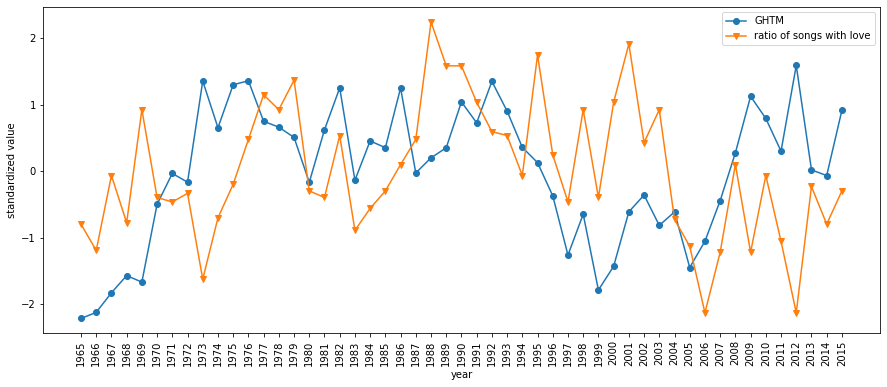

In [671]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], marker='o', label='GHTM')
#plt.plot(st_ghtm['year'], st_ghtm['marriage rate'],label='marriage')
#plt.plot(st_ghtm['year'], st_ghtm['divorce rate'],label='divorce')
plt.plot(st_ghtm['year'], st_love_ratios, marker='v', label='ratio of songs with love')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/love ratios vs GHTM-time series')
plt.show()

In [106]:
# correlation test
love_ratios_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        love_ratios_corr[x] = sp.stats.pearsonr(st_ghtm[x],st_love_ratios)
love_ratios_corr

{'unemployment rate': (-0.04857295895368745, 0.7350010219599771),
 'disposable income change': (0.0019784682645091617, 0.9890064428325521),
 'CPI change': (0.14552054750366888, 0.3082516875373096),
 'birth rate': (0.07204838463679863, 0.6153676138836885),
 'death rate': (0.12052327742197427, 0.39953754007886333),
 'marriage rate': (0.23686595523438214, 0.09422203207284909),
 'divorce rate': (0.4270128847239674, 0.0017780002967865537),
 'homicide rate': (0.3096004392560122, 0.02704911818949176),
 'suicide rate': (-0.05789856151901304, 0.6865314067400169),
 'GHTM': (0.1186799123345853, 0.40683862775939755)}

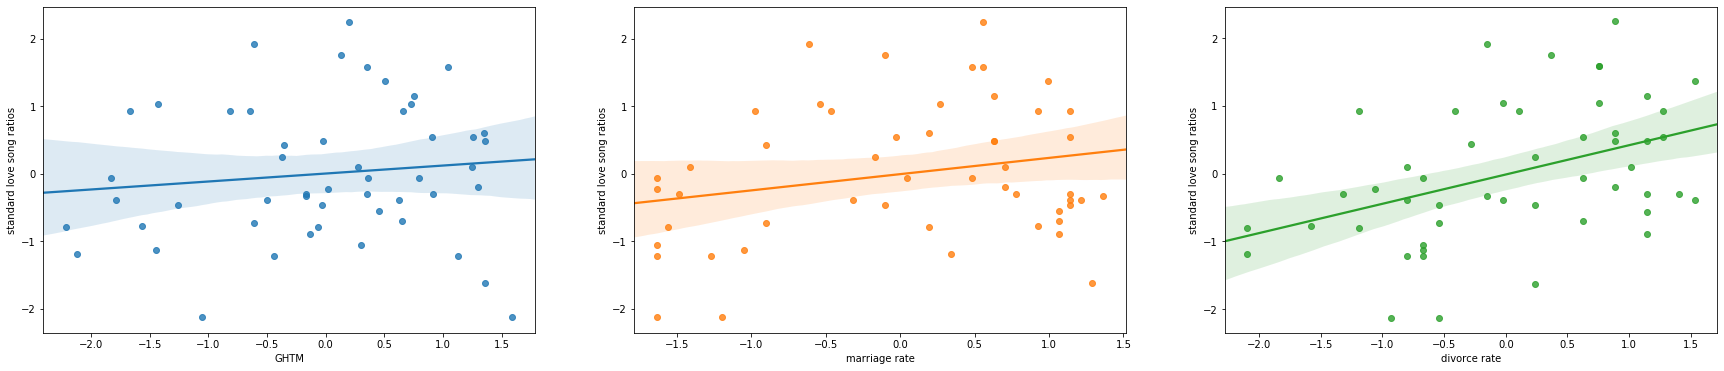

In [24]:
plt.rcParams['figure.figsize']=[30,6]
fig, axes = plt.subplots(1,3)
sns.regplot(st_ghtm['GHTM'],st_love_ratios,ax=axes[0])
axes[0].set_ylabel('standard love song ratios')
sns.regplot(st_ghtm['marriage rate'],st_love_ratios,ax=axes[1])
axes[1].set_ylabel('standard love song ratios')
sns.regplot(st_ghtm['divorce rate'],st_love_ratios,ax=axes[2])
axes[2].set_ylabel('standard love song ratios')
plt.savefig('Pictures_homicide_suicide/love ratios vs three indices')
plt.show()

### love song average ranking each year

In [25]:
love_song_df = en_billboard_df.loc[en_billboard_df['Love']==1]
len(love_song_df)

3104

In [26]:
love_song_df = love_song_df.reset_index(drop=True)

In [27]:
love_song_groups = love_song_df.groupby(['Year'])

In [28]:
love_average_ranks = love_song_groups.mean()['Rank']
love_average_ranks

Year
1965    52.392857
1966    46.788462
1967    50.098361
1968    51.090909
1969    54.876923
1970    51.305085
1971    52.741379
1972    52.333333
1973    50.060000
1974    50.196429
1975    50.796610
1976    48.523810
1977    49.358209
1978    47.955224
1979    52.115942
1980    49.288136
1981    47.389831
1982    51.593750
1983    54.142857
1984    54.379310
1985    49.949153
1986    49.854839
1987    49.761905
1988    47.786667
1989    49.267606
1990    50.464789
1991    46.731343
1992    51.646154
1993    47.281250
1994    49.590164
1995    49.277778
1996    50.868852
1997    46.500000
1998    49.850746
1999    52.898305
2000    48.388060
2001    53.698630
2002    50.765625
2003    49.074627
2004    46.438596
2005    48.000000
2006    48.479167
2007    51.296296
2008    51.774194
2009    51.018519
2010    50.754098
2011    51.163636
2012    47.395833
2013    51.200000
2014    45.303571
2015    48.186441
Name: Rank, dtype: float64

In [29]:
st_love_average_ranks = StandardScaler().fit_transform(love_average_ranks.values.reshape(-1,1)).reshape(51,)

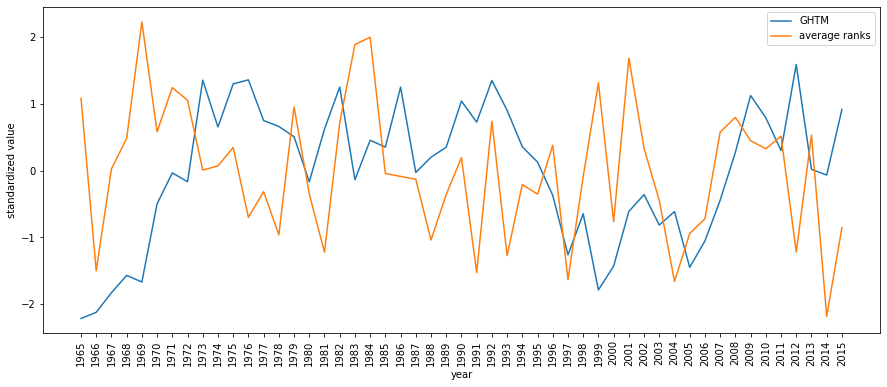

In [653]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'],label='GHTM')
plt.plot(st_ghtm['year'], st_love_average_ranks, label='average ranks')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/love average ranks vs GHTM-time series')
plt.show()

In [31]:
# correlation test
love_ranks_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        love_ranks_corr[x] = sp.stats.pearsonr(st_ghtm[x],st_love_average_ranks)
love_ranks_corr

{'unemployment rate': (0.09031348110882835, 0.528519383255337),
 'disposable income change': (0.18341494058191943, 0.19762991416861295),
 'CPI change': (0.03696455613678063, 0.7967748013686092),
 'birth rate': (0.22157686091897646, 0.11813712614867143),
 'death rate': (0.21952882204499324, 0.12166271976364523),
 'marriage rate': (0.25043590439469343, 0.07631205328414399),
 'divorce rate': (-0.010442243581421304, 0.9420243737561971),
 'homicide rate': (0.10883470589158267, 0.44711766088839033),
 'suicide rate': (0.05871598528110272, 0.6823385244431824),
 'GHTM': (-0.08725133566292788, 0.5426472991460394)}

### Love Occurence in each love song

In [32]:
love_song_df['Frequency'] = love_song_df['Normalized'].apply(lambda x:x.count('love'))

In [33]:
love_average_frequency = love_song_df.groupby(['Year']).mean()['Frequency']
love_average_frequency

Year
1965    5.803571
1966    4.596154
1967    6.655738
1968    4.745455
1969    4.938462
1970    5.474576
1971    4.689655
1972    5.385965
1973    5.820000
1974    6.803571
1975    6.101695
1976    8.317460
1977    5.925373
1978    5.417910
1979    8.478261
1980    6.271186
1981    6.203390
1982    5.671875
1983    5.321429
1984    5.672414
1985    6.271186
1986    6.983871
1987    6.809524
1988    6.706667
1989    8.492958
1990    7.647887
1991    6.791045
1992    6.753846
1993    7.359375
1994    6.836066
1995    6.833333
1996    4.819672
1997    6.551724
1998    5.552239
1999    6.016949
2000    5.776119
2001    4.602740
2002    4.515625
2003    6.761194
2004    5.333333
2005    5.185185
2006    5.333333
2007    5.148148
2008    5.967742
2009    7.129630
2010    7.377049
2011    4.909091
2012    7.145833
2013    6.466667
2014    5.285714
2015    6.135593
Name: Frequency, dtype: float64

In [34]:
st_love_average_frequency = StandardScaler().fit_transform(love_average_frequency.values.reshape(-1,1)).reshape(51,)

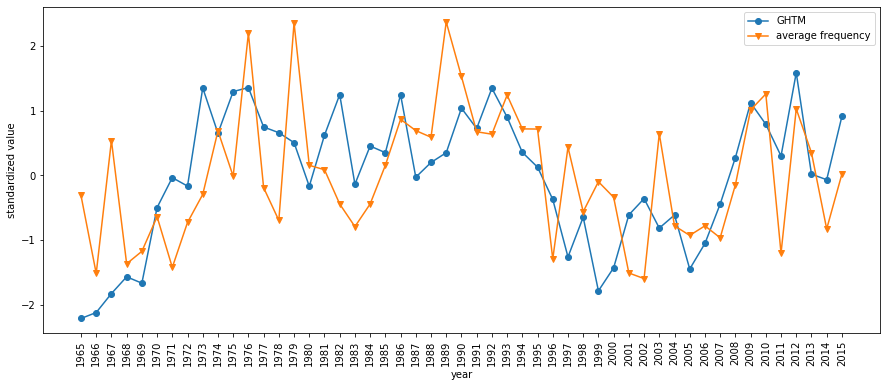

In [665]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], marker='o',label='GHTM')
plt.plot(st_ghtm['year'], st_love_average_frequency, marker='v', label='average frequency')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/love average frequency vs GHTM-time series')
plt.show()

In [36]:
# correlation test
love_frequency_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        love_frequency_corr[x] = sp.stats.pearsonr(st_ghtm[x],st_love_average_frequency)
love_frequency_corr

{'unemployment rate': (0.2955303164709764, 0.03525067203431179),
 'disposable income change': (-0.3275048509584885, 0.01897734187658177),
 'CPI change': (0.16831656838358447, 0.23773493921348637),
 'birth rate': (-0.0852643309837857, 0.5519113074721996),
 'death rate': (-0.08644749508958409, 0.5463859834904314),
 'marriage rate': (0.05768724622762175, 0.6876168530086757),
 'divorce rate': (0.4051205604517143, 0.003188110570863739),
 'homicide rate': (0.25599441515975935, 0.06980272730697747),
 'suicide rate': (0.18551709630482704, 0.19245194673986823),
 'GHTM': (0.49651509235498403, 0.0002107652571997942)}

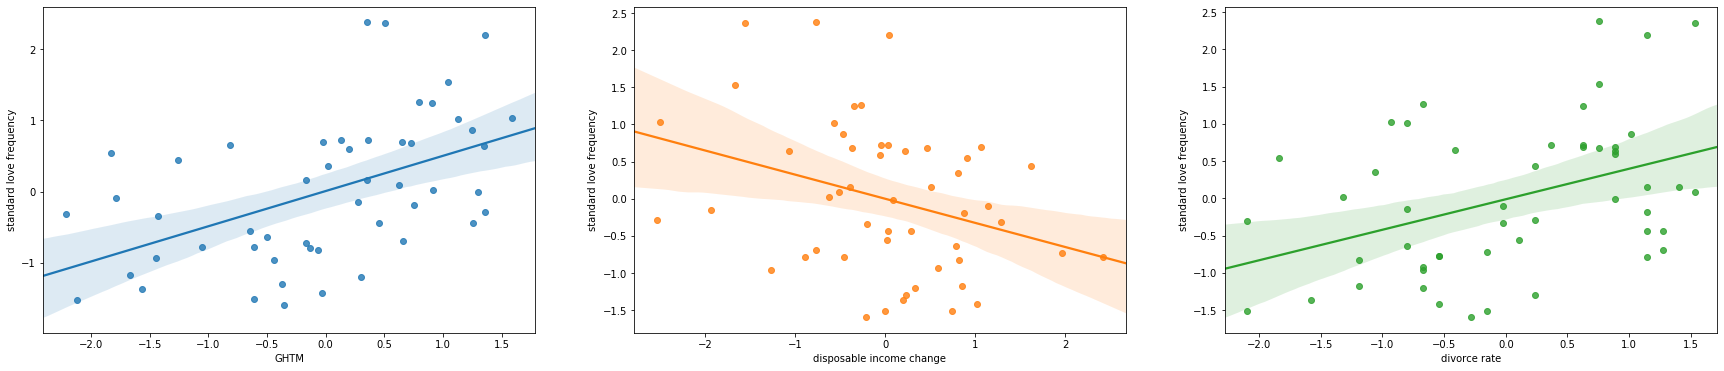

In [38]:
plt.rcParams['figure.figsize']=[30,6]
fig, axes = plt.subplots(1,3)
sns.regplot(st_ghtm['GHTM'],st_love_average_frequency,ax=axes[0])
axes[0].set_ylabel('standard love frequency')
sns.regplot(st_ghtm['disposable income change'],st_love_average_frequency,ax=axes[1])
axes[1].set_ylabel('standard love frequency')
sns.regplot(st_ghtm['divorce rate'],st_love_average_frequency,ax=axes[2])
axes[2].set_ylabel('standard love frequency')
plt.savefig('Pictures_homicide_suicide/love frequency vs three indices')
plt.show()

### Love Occurence in all song

In [615]:
en_billboard_df['Frequency'] = en_billboard_df['Normalized'].apply(lambda x:x.count('love'))

In [617]:
en_average_frequency = en_billboard_df.groupby(['Year']).mean()['Frequency']
en_average_frequency

Year
1965    3.282828
1966    2.489583
1967    4.060000
1968    2.690722
1969    3.309278
1970    3.230000
1971    2.747475
1972    3.197917
1973    3.000000
1974    3.887755
1975    3.673469
1976    5.346939
1977    4.051020
1978    3.630000
1979    5.909091
1980    3.737374
1981    3.660000
1982    3.666667
1983    2.980000
1984    3.290000
1985    3.737374
1986    4.330000
1987    4.377551
1988    5.030000
1989    6.030000
1990    5.430000
1991    4.595960
1992    4.390000
1993    4.757576
1994    4.170000
1995    4.920000
1996    3.030928
1997    3.838384
1998    3.720000
1999    3.550000
2000    3.909091
2001    3.360000
2002    2.890000
2003    4.530000
2004    3.040000
2005    2.828283
2006    2.585859
2007    2.780000
2008    3.700000
2009    3.850000
2010    4.500000
2011    2.700000
2012    3.464646
2013    3.880000
2014    2.989899
2015    3.656566
Name: Frequency, dtype: float64

In [618]:
st_en_average_frequency = StandardScaler().fit_transform(en_average_frequency.values.reshape(-1,1)).reshape(51,)

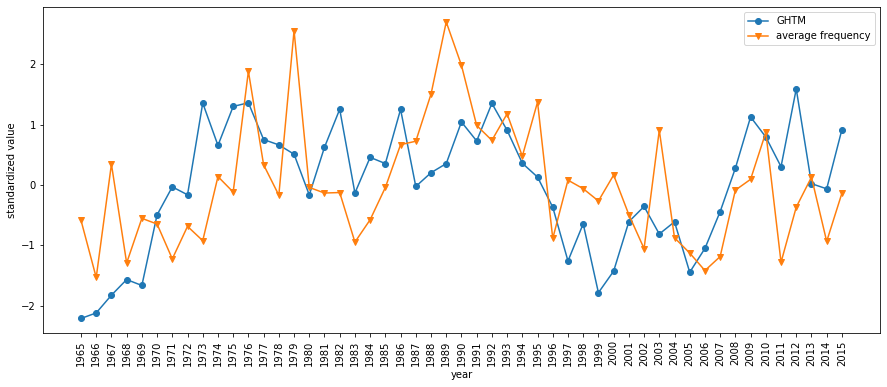

In [666]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], marker='o', label='GHTM')
plt.plot(st_ghtm['year'], st_en_average_frequency, marker='v', label='average frequency')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/en average frequency vs GHTM-time series')
plt.show()

In [620]:
# correlation test
en_frequency_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        en_frequency_corr[x] = sp.stats.pearsonr(st_ghtm[x],st_en_average_frequency)
en_frequency_corr

{'unemployment rate': (0.18210570065115503, 0.20090428631222126),
 'disposable income change': (-0.24524193549018516, 0.08281933922143257),
 'CPI change': (0.2019326618663824, 0.1553100420639658),
 'birth rate': (-0.014802839894642913, 0.9178849961776103),
 'death rate': (0.0009518882539520726, 0.9947106128923072),
 'marriage rate': (0.16107777765160738, 0.2588134054189355),
 'divorce rate': (0.4969394245217855, 0.0002077399880497733),
 'homicide rate': (0.34070241486779207, 0.014426386190351694),
 'suicide rate': (0.11951871004662803, 0.40350685346272547),
 'GHTM': (0.41515662613478377, 0.0024510614711145207)}

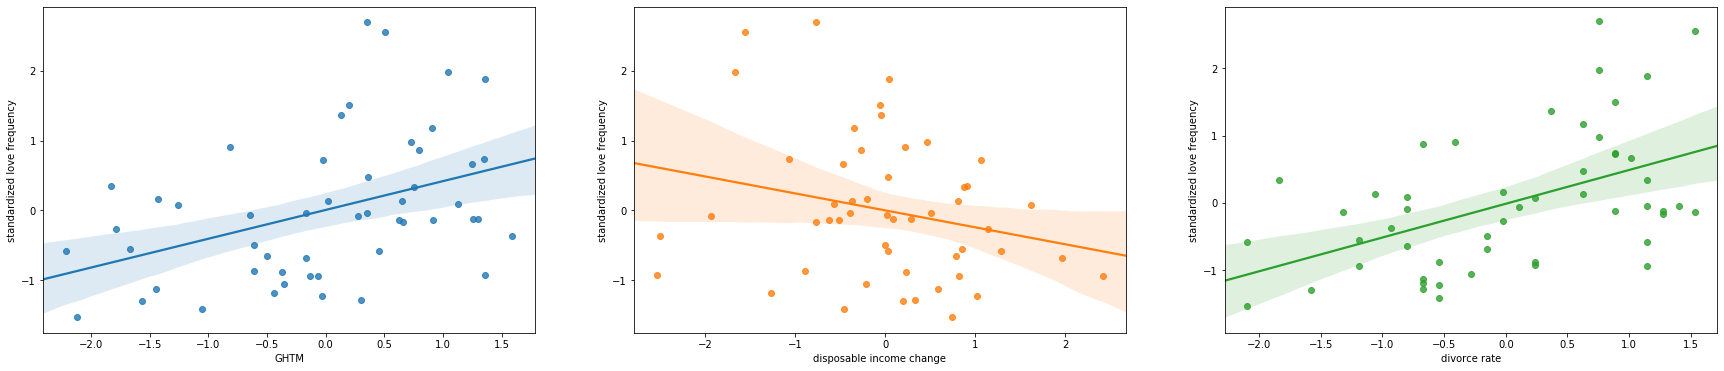

In [652]:
plt.rcParams['figure.figsize']=[30,6]
fig, axes = plt.subplots(1,3)
sns.regplot(st_ghtm['GHTM'],st_en_average_frequency,ax=axes[0])
axes[0].set_ylabel('standardized love frequency')
sns.regplot(st_ghtm['disposable income change'],st_en_average_frequency,ax=axes[1])
axes[1].set_ylabel('standardized love frequency')
sns.regplot(st_ghtm['divorce rate'],st_en_average_frequency,ax=axes[2])
axes[2].set_ylabel('standardized love frequency')
plt.savefig('Pictures_homicide_suicide/love frequency all songs vs three indices')
plt.show()

### All Song length Analysis

In [621]:
en_billboard_df['Length'] = en_billboard_df['Lyrics'].apply(lambda x:len([x for x in re.split('\W+',x) if x not in ['',' ']]))

In [622]:
en_average_length = en_billboard_df.groupby(['Year']).mean()['Length']
en_average_length

Year
1965    203.363636
1966    203.562500
1967    194.330000
1968    220.773196
1969    215.463918
1970    234.500000
1971    227.181818
1972    245.416667
1973    240.092784
1974    237.846939
1975    235.836735
1976    263.051020
1977    241.704082
1978    262.370000
1979    267.020202
1980    251.989899
1981    259.670000
1982    271.060606
1983    305.450000
1984    282.490000
1985    296.010101
1986    270.140000
1987    292.887755
1988    309.460000
1989    337.930000
1990    370.030000
1991    340.060606
1992    344.110000
1993    401.010101
1994    379.160000
1995    401.030000
1996    374.639175
1997    406.929293
1998    476.280000
1999    389.190000
2000    419.676768
2001    460.150000
2002    487.210000
2003    523.750000
2004    503.910000
2005    515.858586
2006    535.292929
2007    523.810000
2008    476.580000
2009    476.580000
2010    474.920000
2011    469.430000
2012    398.808081
2013    413.540000
2014    445.020202
2015    436.868687
Name: Length, dtype: float

In [623]:
st_en_average_length = StandardScaler().fit_transform(en_average_length.values.reshape(-1,1)).reshape(51,)

In [624]:
en_length_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        en_length_corr[x] = sp.stats.pearsonr(st_ghtm[x],st_en_average_length)
en_length_corr

{'unemployment rate': (0.03324490899347128, 0.8168531568992715),
 'disposable income change': (-0.24199773104296404, 0.08709990159174662),
 'CPI change': (-0.5369622404282474, 4.858801374318614e-05),
 'birth rate': (-0.7610369331736972, 9.071159652610966e-11),
 'death rate': (-0.8733414603807869, 6.37515244726909e-17),
 'marriage rate': (-0.8689641830720698, 1.390538096120791e-16),
 'divorce rate': (-0.21063314732118085, 0.1379066662521855),
 'homicide rate': (-0.6971430174895172, 1.321691156379273e-08),
 'suicide rate': (-0.733483129288264, 9.246621246126511e-10),
 'GHTM': (-0.03776093580720083, 0.7924924237079908)}

In [626]:
en_billboard_df['per_word'] = en_billboard_df['Frequency']/en_billboard_df['Length']

In [627]:
en_average_per_word = en_billboard_df.groupby(['Year']).mean()['per_word']
en_average_per_word

Year
1965    0.017035
1966    0.012841
1967    0.021091
1968    0.013244
1969    0.016762
1970    0.013581
1971    0.013289
1972    0.014305
1973    0.012123
1974    0.015682
1975    0.015360
1976    0.020346
1977    0.017053
1978    0.014757
1979    0.021670
1980    0.014768
1981    0.014323
1982    0.014006
1983    0.011358
1984    0.011485
1985    0.013138
1986    0.015838
1987    0.014216
1988    0.015928
1989    0.016902
1990    0.016158
1991    0.014512
1992    0.013723
1993    0.013725
1994    0.012331
1995    0.014310
1996    0.008232
1997    0.010588
1998    0.008935
1999    0.009186
2000    0.010464
2001    0.008943
2002    0.005930
2003    0.008763
2004    0.006284
2005    0.006066
2006    0.004990
2007    0.005652
2008    0.008237
2009    0.008143
2010    0.009669
2011    0.006324
2012    0.009375
2013    0.008457
2014    0.007082
2015    0.009007
Name: per_word, dtype: float64

In [628]:
st_per_word = StandardScaler().fit_transform(en_average_per_word.values.reshape(-1,1)).reshape(51,)

In [629]:
en_per_word_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        en_per_word_corr[x] = sp.stats.pearsonr(st_ghtm[x],st_per_word)
en_per_word_corr

{'unemployment rate': (0.0041883901567052045, 0.9767292746334271),
 'disposable income change': (0.07529307899629444, 0.5995023524359337),
 'CPI change': (0.5335199114369379, 5.545739110842541e-05),
 'birth rate': (0.641733857669998, 3.879652064370516e-07),
 'death rate': (0.7143438787423411, 3.948680134456066e-09),
 'marriage rate': (0.7549794022702048, 1.5509868665454703e-10),
 'divorce rate': (0.3704323971265373, 0.007456047727016595),
 'homicide rate': (0.7154478856969756, 3.6431449737494893e-09),
 'suicide rate': (0.6091535270796156, 2.1001862355639354e-06),
 'GHTM': (0.17081523091585524, 0.23074000114336474)}

### love Song length Analysis

In [630]:
love_song_df['Length'] = love_song_df['Lyrics'].apply(lambda x:len([x for x in re.split('\W+',x) if x not in ['',' ']]))

In [631]:
lovesong_average_length = love_song_df.groupby(['Year']).mean()['Length']
lovesong_average_length

Year
1965    195.982143
1966    202.442308
1967    196.032787
1968    213.072727
1969    216.692308
1970    239.677966
1971    228.086207
1972    243.000000
1973    242.520000
1974    249.035714
1975    230.271186
1976    264.285714
1977    233.208955
1978    261.029851
1979    264.492754
1980    256.254237
1981    254.067797
1982    267.281250
1983    300.678571
1984    284.534483
1985    304.000000
1986    271.854839
1987    311.079365
1988    311.533333
1989    340.718310
1990    360.859155
1991    348.910448
1992    340.553846
1993    404.656250
1994    367.475410
1995    400.166667
1996    385.114754
1997    421.103448
1998    493.865672
1999    397.338983
2000    418.044776
2001    450.438356
2002    490.796875
2003    533.850746
2004    511.807018
2005    529.037037
2006    564.333333
2007    533.092593
2008    481.258065
2009    490.370370
2010    470.836066
2011    478.745455
2012    409.895833
2013    434.383333
2014    467.517857
2015    444.288136
Name: Length, dtype: float

In [632]:
st_lovesong_average_length = StandardScaler().fit_transform(lovesong_average_length.values.reshape(-1,1)).reshape(51,)
lovesong_length_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        lovesong_length_corr[x] = sp.stats.pearsonr(st_ghtm[x],st_lovesong_average_length)
lovesong_length_corr

{'unemployment rate': (0.024131946440788747, 0.866513623221327),
 'disposable income change': (-0.22979537674423584, 0.1047660969393709),
 'CPI change': (-0.5373328530727965, 4.789704007356762e-05),
 'birth rate': (-0.7672932952282261, 5.1260069418409396e-11),
 'death rate': (-0.8745099316920935, 5.1517888969699514e-17),
 'marriage rate': (-0.8730718078641198, 6.694450612560324e-17),
 'divorce rate': (-0.22060358310680203, 0.11980276472991974),
 'homicide rate': (-0.7060512083540763, 7.145892258921476e-09),
 'suicide rate': (-0.7233960446390865, 2.017273744779171e-09),
 'GHTM': (-0.046142854253106755, 0.7478103891769804)}

In [633]:
love_song_df['per_word'] = love_song_df['Frequency']/love_song_df['Length']
lovesong_per_word = love_song_df.groupby(['Year']).mean()['per_word']
lovesong_per_word

Year
1965    0.030115
1966    0.023706
1967    0.034575
1968    0.023358
1969    0.025015
1970    0.023019
1971    0.022683
1972    0.024093
1973    0.023520
1974    0.027443
1975    0.025513
1976    0.031650
1977    0.024943
1978    0.022025
1979    0.031092
1980    0.024779
1981    0.024276
1982    0.021665
1983    0.020281
1984    0.019801
1985    0.022045
1986    0.025545
1987    0.022114
1988    0.021238
1989    0.023806
1990    0.022758
1991    0.021443
1992    0.021112
1993    0.021230
1994    0.020215
1995    0.019874
1996    0.013090
1997    0.018073
1998    0.013336
1999    0.015569
2000    0.015462
2001    0.012250
2002    0.009265
2003    0.013079
2004    0.011025
2005    0.011122
2006    0.010292
2007    0.010466
2008    0.013285
2009    0.015079
2010    0.015850
2011    0.011498
2012    0.019337
2013    0.014095
2014    0.012520
2015    0.015113
Name: per_word, dtype: float64

In [635]:
st_lovesong_per_word = StandardScaler().fit_transform(lovesong_per_word.values.reshape(-1,1)).reshape(51,)
lovesong_per_word_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        lovesong_per_word_corr[x] = sp.stats.pearsonr(st_ghtm[x],st_lovesong_per_word)
lovesong_per_word_corr

{'unemployment rate': (0.014263119819344486, 0.9208692447808838),
 'disposable income change': (0.0969361295154002, 0.4985983866144868),
 'CPI change': (0.5296536488452616, 6.422786012476074e-05),
 'birth rate': (0.7061469564534653, 7.097943727845505e-09),
 'death rate': (0.7738154183608824, 2.7736534302004855e-11),
 'marriage rate': (0.7676331804448229, 4.96698495778809e-11),
 'divorce rate': (0.2578476701694711, 0.0677334245815467),
 'homicide rate': (0.6899075411794834, 2.143276087520687e-08),
 'suicide rate': (0.6846361475212603, 3.0218501177301304e-08),
 'GHTM': (0.13640726020064678, 0.33984892971505515)}

### Study 2 -- Sentiment of love

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk_senti = SentimentIntensityAnalyzer()

In [139]:
def overall_senti(s):
    doc = nlp(s)
    scores = [nltk_senti.polarity_scores(i.text)['compound'] for i in doc.sents]
    return np.mean(scores)

### overall song sentiment polarity

In [144]:
en_billboard_df['Overall Sentiment'] = en_billboard_df['Lyrics'].apply(overall_senti)

In [145]:
average_overall_sentiment = en_billboard_df.groupby(['Year']).mean()['Overall Sentiment']
average_overall_sentiment

Year
1965    0.147858
1966    0.130179
1967    0.151322
1968    0.121127
1969    0.161765
1970    0.126037
1971    0.131691
1972    0.159090
1973    0.122501
1974    0.165508
1975    0.136421
1976    0.174226
1977    0.151652
1978    0.117492
1979    0.145766
1980    0.142542
1981    0.138767
1982    0.132074
1983    0.100582
1984    0.083351
1985    0.126281
1986    0.115811
1987    0.123126
1988    0.114714
1989    0.133332
1990    0.119367
1991    0.150821
1992    0.140308
1993    0.103576
1994    0.117688
1995    0.105218
1996    0.125275
1997    0.097585
1998    0.072560
1999    0.099158
2000    0.117080
2001    0.098246
2002    0.074057
2003    0.066731
2004    0.059364
2005    0.049139
2006    0.039101
2007    0.058060
2008    0.069873
2009    0.061588
2010    0.075177
2011    0.067416
2012    0.068803
2013    0.074702
2014    0.059209
2015    0.060147
Name: Overall Sentiment, dtype: float64

In [146]:
st_average_overall_sentiment = StandardScaler().fit_transform(average_overall_sentiment.values.reshape(-1,1)).reshape(51,)

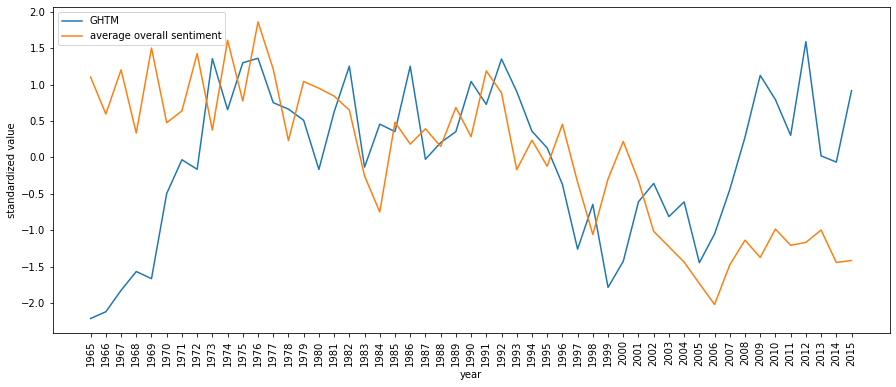

In [147]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], label='GHTM')
plt.plot(st_ghtm['year'], st_average_overall_sentiment, label='average overall sentiment')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
#plt.savefig('Pictures_homicide_suicide/average overall sentiment vs GHTM-time series')
plt.show()

In [148]:
# correlation test
overall_sentiment_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        overall_sentiment_corr[x] = sp.stats.pearsonr(st_ghtm[x], st_average_overall_sentiment)
overall_sentiment_corr

{'unemployment rate': (-0.017105861872383797, 0.9051640934975663),
 'disposable income change': (0.21016774370344243, 0.1387990419075321),
 'CPI change': (0.5685304864159839, 1.3470526033268317e-05),
 'birth rate': (0.686557607961541, 2.668392132611628e-08),
 'death rate': (0.8025422604759098, 1.4252115444352677e-12),
 'marriage rate': (0.8207633815842554, 1.6654783388777244e-13),
 'divorce rate': (0.3583711358481088, 0.009816478496305148),
 'homicide rate': (0.7733113225390331, 2.910588862004096e-11),
 'suicide rate': (0.5373984674019625, 4.777565235910184e-05),
 'GHTM': (0.075614026865938, 0.597942849752573)}

### decomposed love sentiment polarity

In [45]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [46]:
import lucem_illud_2020
def decomposed_senti(s):
    doc = nlp(s)
    scores = []
    for i in doc.sents:
        normalized = lucem_illud_2020.normalizeTokens(i.text)
        if 'love' in normalized:
            sentiment = nltk_senti.polarity_scores(i.text)['compound']
            scores += [sentiment]*normalized.count('love')
    return np.mean(scores)

In [47]:
decomposed_result = list(map(decomposed_senti, love_song_df['Lyrics']))
decomposed_result

[-0.03751428571428569,
 0.8000750000000002,
 0.8555,
 0.8314333333333334,
 0.7481333333333334,
 0.6535,
 0.88534,
 -0.5216,
 0.4027,
 0.7881125,
 0.35645000000000004,
 0.63535,
 0.6369,
 0.919,
 0.6369,
 0.6369,
 0.900711111111111,
 0.6369,
 0.79446,
 0.6303,
 0.6111166666666666,
 0.6689000000000002,
 0.91266,
 0.93,
 0.7826333333333334,
 0.8196249999999999,
 0.6090428571428571,
 -0.5216,
 0.4662863636363637,
 0.5252666666666667,
 0.0761,
 0.8542000000000001,
 0.63335,
 0.8739095238095238,
 0.26258,
 0.6927800000000001,
 0.7008875000000001,
 0.07502,
 -0.5216,
 0.6597000000000001,
 0.6369,
 0.6369,
 -0.02097499999999998,
 0.7906,
 0.7184,
 0.6369,
 0.7956666666666666,
 0.88205,
 0.4390333333333334,
 0.6067666666666667,
 0.6369,
 0.46182,
 0.9230333333333333,
 -0.010999999999999996,
 0.7579,
 0.8275909090909089,
 0.7469,
 0.6892625,
 0.04873529411764705,
 0.2732,
 0.6369,
 0.58528,
 0.92378,
 0.4767,
 0.982459459459459,
 0.6626666666666667,
 0.7342500000000001,
 0.8672764705882353,
 0.6

In [48]:
love_song_df['Decomposed Sentiment'] = decomposed_result

In [49]:
average_decomposed_sentiment = love_song_df.groupby(['Year']).mean()['Decomposed Sentiment']
average_decomposed_sentiment

Year
1965    0.571766
1966    0.538744
1967    0.612503
1968    0.523384
1969    0.629612
1970    0.587313
1971    0.553947
1972    0.638363
1973    0.590035
1974    0.612145
1975    0.636675
1976    0.700216
1977    0.654203
1978    0.630816
1979    0.597132
1980    0.642465
1981    0.597708
1982    0.628978
1983    0.597906
1984    0.558699
1985    0.645053
1986    0.593061
1987    0.547169
1988    0.520512
1989    0.613392
1990    0.642902
1991    0.606899
1992    0.625398
1993    0.574718
1994    0.585872
1995    0.571376
1996    0.596083
1997    0.606801
1998    0.589607
1999    0.494706
2000    0.564138
2001    0.572723
2002    0.577571
2003    0.567384
2004    0.590984
2005    0.482868
2006    0.576670
2007    0.521253
2008    0.577449
2009    0.611636
2010    0.590883
2011    0.575505
2012    0.586548
2013    0.563661
2014    0.584978
2015    0.513439
Name: Decomposed Sentiment, dtype: float64

In [122]:
#average_decomposed_sentiment = []
#for index,df in list(love_song_df.groupby(['Year'])):
#    all_sentiment = df['Decomposed Sentiment'].sum()
#    average_decomposed_sentiment.append(np.mean(all_sentiment))

In [50]:
st_average_decomposed_sentiment = StandardScaler().fit_transform(average_decomposed_sentiment.values.reshape(-1,1)).reshape(51,)
#st_average_decomposed_sentiment = StandardScaler().fit_transform(np.array(average_decomposed_sentiment).reshape(-1,1)).reshape(51,)

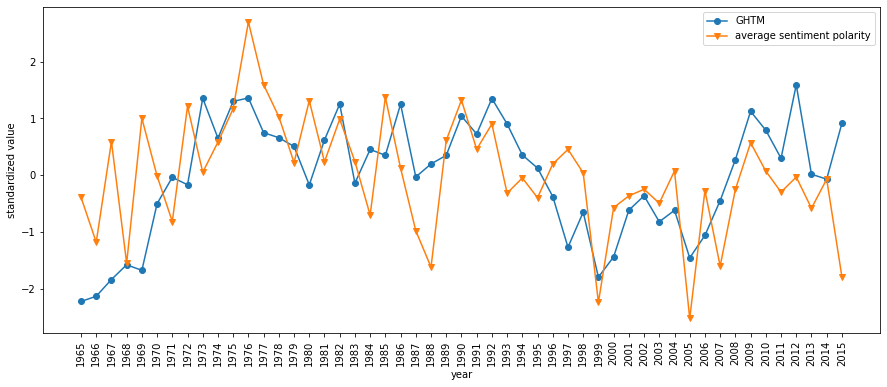

In [667]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], marker='o', label='GHTM')
plt.plot(st_ghtm['year'], st_average_decomposed_sentiment, marker='v', label='average sentiment polarity')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/average decomposed sentiment vs GHTM-time series')
plt.show()

In [52]:
decomposed_sentiment_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        decomposed_sentiment_corr[x] = sp.stats.pearsonr(st_ghtm[x], st_average_decomposed_sentiment)
decomposed_sentiment_corr

{'unemployment rate': (0.4180038901015383, 0.0022715695652513555),
 'disposable income change': (-0.0468181713267369, 0.7442437700448541),
 'CPI change': (0.40473661987031573, 0.0032198307801820955),
 'birth rate': (0.11714858891274099, 0.41296202114720715),
 'death rate': (0.22568603580742858, 0.11129826052896866),
 'marriage rate': (0.3847725685221889, 0.005304732488267603),
 'divorce rate': (0.4481448305208174, 0.0009743382571710101),
 'homicide rate': (0.48768613148485085, 0.0002835319610106973),
 'suicide rate': (0.38179329572584664, 0.005700483135563436),
 'GHTM': (0.4423886048578727, 0.0011521962733374376)}

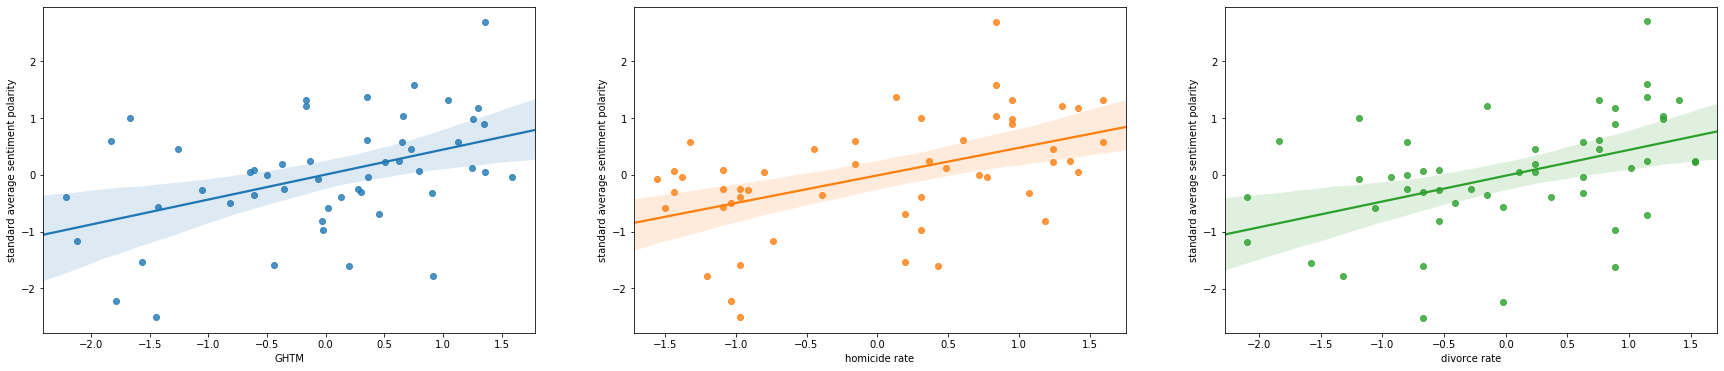

In [648]:
plt.rcParams['figure.figsize']=[30,6]
fig, axes = plt.subplots(1,3)
sns.regplot(st_ghtm['GHTM'],st_average_decomposed_sentiment,ax=axes[0])
axes[0].set_ylabel('standard average sentiment polarity')
sns.regplot(st_ghtm['homicide rate'],st_average_decomposed_sentiment,ax=axes[1])
axes[1].set_ylabel('standard average sentiment polarity')
sns.regplot(st_ghtm['divorce rate'],st_average_decomposed_sentiment,ax=axes[2])
axes[2].set_ylabel('standard average sentiment polarity')
plt.savefig('Pictures_homicide_suicide/average_decomposed_sentiment vs three indices')
plt.show()

In [53]:
# comparison between decomposed and overall
sp.stats.pearsonr(st_average_overall_sentiment, st_average_decomposed_sentiment)

(0.5784275584495133, 8.763252679671634e-06)

### ratio of positive and negative love

In [54]:
def pos_neg_count(s):
    doc = nlp(s)
    pos = 0
    neg = 0
    for i in doc.sents:
        normalized = lucem_illud_2020.normalizeTokens(i.text)
        if 'love' in normalized:
            sentiment = nltk_senti.polarity_scores(i.text)['compound']
            if sentiment>0.05:
                pos += normalized.count('love')
            if sentiment<-0.05:
                neg += normalized.count('love')
    return (pos,neg)

In [55]:
pos_neg_love = list(map(pos_neg_count, love_song_df['Lyrics']))
pos_neg_love

[(3, 3),
 (20, 0),
 (6, 0),
 (3, 0),
 (6, 0),
 (2, 0),
 (5, 0),
 (0, 2),
 (9, 1),
 (8, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (9, 0),
 (3, 0),
 (1, 0),
 (27, 0),
 (1, 0),
 (5, 0),
 (5, 0),
 (12, 0),
 (3, 0),
 (5, 0),
 (20, 0),
 (3, 0),
 (4, 0),
 (7, 0),
 (0, 2),
 (18, 4),
 (5, 0),
 (1, 1),
 (2, 0),
 (2, 0),
 (21, 0),
 (4, 1),
 (5, 0),
 (8, 0),
 (2, 3),
 (0, 2),
 (7, 0),
 (1, 0),
 (2, 0),
 (5, 3),
 (1, 0),
 (1, 0),
 (1, 0),
 (6, 0),
 (4, 0),
 (3, 0),
 (3, 0),
 (1, 0),
 (3, 0),
 (3, 0),
 (1, 3),
 (1, 0),
 (11, 0),
 (1, 0),
 (7, 1),
 (9, 8),
 (1, 0),
 (1, 0),
 (5, 0),
 (5, 0),
 (1, 0),
 (37, 0),
 (7, 2),
 (2, 0),
 (17, 0),
 (1, 0),
 (2, 0),
 (5, 0),
 (2, 0),
 (0, 3),
 (1, 0),
 (4, 0),
 (6, 0),
 (2, 2),
 (1, 0),
 (3, 2),
 (1, 0),
 (3, 0),
 (2, 2),
 (2, 0),
 (2, 0),
 (1, 0),
 (11, 0),
 (3, 0),
 (1, 2),
 (3, 0),
 (3, 0),
 (1, 2),
 (5, 0),
 (4, 0),
 (9, 0),
 (1, 0),
 (4, 0),
 (3, 0),
 (1, 0),
 (3, 0),
 (1, 0),
 (7, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (5, 0),
 (2, 0),
 (1, 0),
 (2, 0),
 (2, 0),
 (5, 0),


In [56]:
love_song_df['Positive'] = [x[0] for x in pos_neg_love]
love_song_df['Negative'] = [x[1] for x in pos_neg_love]

In [57]:
average_positive = love_song_df.groupby(['Year']).mean()['Positive']
average_negative = love_song_df.groupby(['Year']).mean()['Negative']
st_average_positive = StandardScaler().fit_transform(average_positive.values.reshape(-1,1)).reshape(51,)
st_average_negative = StandardScaler().fit_transform(average_negative.values.reshape(-1,1)).reshape(51,)

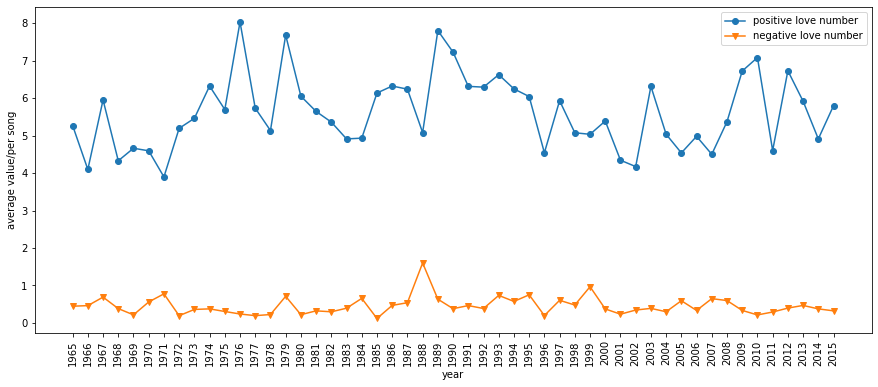

In [668]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], average_positive, marker='o', label='positive love number')
plt.plot(st_ghtm['year'], average_negative, marker='v', label='negative love number')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('average value/per song')
plt.legend()
plt.savefig('Pictures_homicide_suicide/positive vs negative love')
plt.show()

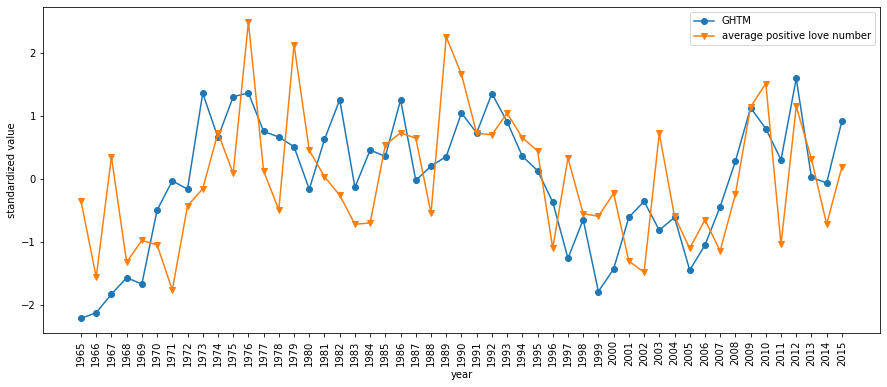

In [669]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], marker='o', label='GHTM')
plt.plot(st_ghtm['year'], st_average_positive, marker='v', label='average positive love number')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/average positive love vs GHTM-time series')
plt.show()

In [60]:
positive_love_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        positive_love_corr[x] = sp.stats.pearsonr(st_ghtm[x], st_average_positive)
positive_love_corr

{'unemployment rate': (0.3558712948911974, 0.010379260975575202),
 'disposable income change': (-0.34245900241628274, 0.013897561505279536),
 'CPI change': (0.1826602852445017, 0.1995126346222386),
 'birth rate': (-0.13384065035493348, 0.3490983515429967),
 'death rate': (-0.11806249828755308, 0.4093011763742244),
 'marriage rate': (0.03259707656004823, 0.8203624344926129),
 'divorce rate': (0.4070005055834498, 0.003036743366267693),
 'homicide rate': (0.24606271137300179, 0.08176299467808565),
 'suicide rate': (0.2048675687652216, 0.14926769366743775),
 'GHTM': (0.541699674741555, 4.040751658403681e-05)}

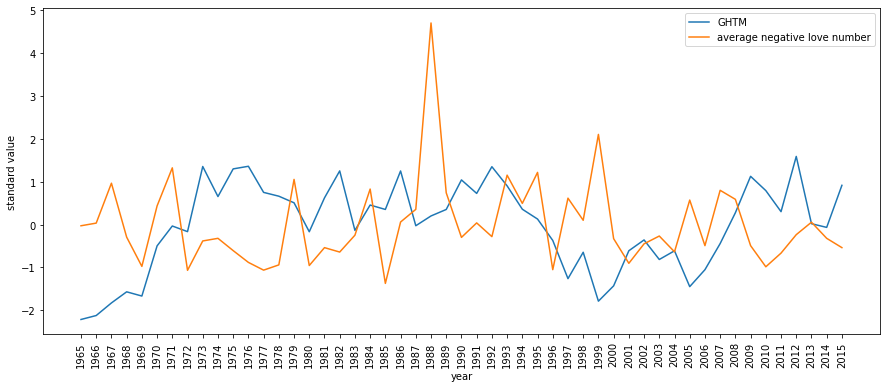

In [61]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], label='GHTM')
plt.plot(st_ghtm['year'], st_average_negative, label='average negative love number')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standard value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/average negative love vs GHTM-time series')
plt.show()

In [62]:
negative_love_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        negative_love_corr[x] = sp.stats.pearsonr(st_ghtm[x], st_average_negative)
negative_love_corr

{'unemployment rate': (-0.2579411567272849, 0.06763034941326791),
 'disposable income change': (0.020862299543749196, 0.8844670641828328),
 'CPI change': (-0.10196517988854845, 0.476474927386733),
 'birth rate': (0.13291212093968344, 0.3524823327341205),
 'death rate': (0.059307491704344774, 0.6793103652265038),
 'marriage rate': (0.03985256330413627, 0.7812742540282563),
 'divorce rate': (0.01484799580854538, 0.9176353679661516),
 'homicide rate': (0.013982701356816136, 0.9224201782329355),
 'suicide rate': (-0.11966249964356666, 0.40293730340338),
 'GHTM': (-0.15106643214849486, 0.28997695421921155)}

### positive love polarity score

In [63]:
def decomposed_positive(s):
    doc = nlp(s)
    scores = []
    for i in doc.sents:
        normalized = lucem_illud_2020.normalizeTokens(i.text)
        if 'love' in normalized:
            sentiment = nltk_senti.polarity_scores(i.text)['compound']
            if sentiment>0.05:
                scores += [sentiment]*normalized.count('love')
    return np.mean(scores) if len(scores)>0 else None

In [64]:
pos_polarity_result = list(map(decomposed_positive, love_song_df['Lyrics']))
pos_polarity_result

[0.5835,
 0.8000750000000002,
 0.8555,
 0.8314333333333334,
 0.7481333333333334,
 0.6535,
 0.88534,
 None,
 0.5219444444444444,
 0.7881125,
 0.7506,
 0.63535,
 0.6369,
 0.919,
 0.6369,
 0.6369,
 0.900711111111111,
 0.6369,
 0.79446,
 0.6303,
 0.6111166666666666,
 0.6689000000000002,
 0.91266,
 0.93,
 0.7826333333333334,
 0.8196249999999999,
 0.6090428571428571,
 None,
 0.7201055555555556,
 0.62844,
 0.6369,
 0.8542000000000001,
 0.63335,
 0.8739095238095238,
 0.531025,
 0.6927800000000001,
 0.7008875000000001,
 0.875,
 None,
 0.6597000000000001,
 0.6369,
 0.6369,
 0.55538,
 0.7906,
 0.7184,
 0.6369,
 0.7956666666666666,
 0.88205,
 0.4390333333333334,
 0.6067666666666667,
 0.6369,
 0.7469666666666667,
 0.9230333333333333,
 0.34,
 0.7579,
 0.8275909090909089,
 0.7469,
 0.8622428571428572,
 0.5650666666666667,
 0.2732,
 0.6369,
 0.58528,
 0.92378,
 0.4767,
 0.982459459459459,
 0.8992857142857144,
 0.7342500000000001,
 0.8672764705882353,
 0.6369,
 0.6369,
 0.7856,
 0.2446,
 None,
 0.7579,

In [65]:
love_song_df['Positive Polarity'] = pos_polarity_result
average_pos_polarity = []
for index,df in list(love_song_df.groupby(['Year'])):
    positive_df = df.loc[df['Positive Polarity'] != None]
    average_pos_polarity.append(positive_df['Positive Polarity'].mean())

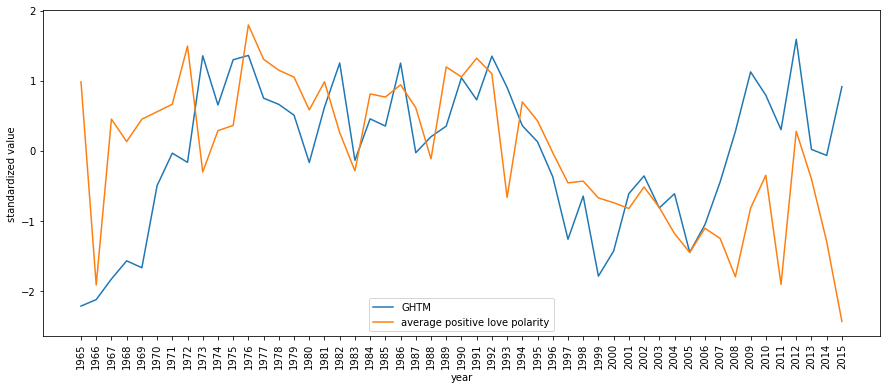

In [107]:
st_pos_polarity_result = StandardScaler().fit_transform(np.array(average_pos_polarity).reshape(-1,1)).reshape(51,)
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], label='GHTM')
plt.plot(st_ghtm['year'], st_pos_polarity_result, label='average positive love polarity')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/average positive love polarity vs GHTM-time series')
plt.show()

In [67]:
pos_polarity_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        pos_polarity_corr[x] = sp.stats.pearsonr(st_ghtm[x], st_pos_polarity_result)
pos_polarity_corr

{'unemployment rate': (0.16206468216656128, 0.25586810072898986),
 'disposable income change': (0.07922985025171625, 0.5804982280400481),
 'CPI change': (0.44503635209893977, 0.0010670620600325162),
 'birth rate': (0.44212040260907404, 0.001161150293575477),
 'death rate': (0.5371745805510384, 4.8191013478515294e-05),
 'marriage rate': (0.7082536321649644, 6.1165400870627365e-09),
 'divorce rate': (0.5512964756061492, 2.7575506671317464e-05),
 'homicide rate': (0.7194327544489252, 2.7155802018711594e-09),
 'suicide rate': (0.46473021147816407, 0.0005911036420654507),
 'GHTM': (0.3095015126294516, 0.027100653556642654)}

### Study 3 -- Semantic of love

### Dynamic Word-embedding Training

In [68]:
import gensim
import copy
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [70]:
def compareModels(df, category, text_column_name='Sentence Normalized', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [518]:
def rawModels(df, category, text_column_name='Sentence Normalized', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum(), workers=1)
    return embeddings_raw

In [404]:
from scipy.spatial.distance import cosine
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(cosine(embeddingsDict[cat][0][word],embed[word]))
    return pd.DataFrame(dists, index = cats)

In [519]:
lovesong_rawEmbeddings, lovesong_comparedEmbeddings = compareModels(love_song_df, 'Year')

In [520]:
overall_rawEmbeddings, overall_comparedEmbeddings = compareModels(en_billboard_df, 'Year')

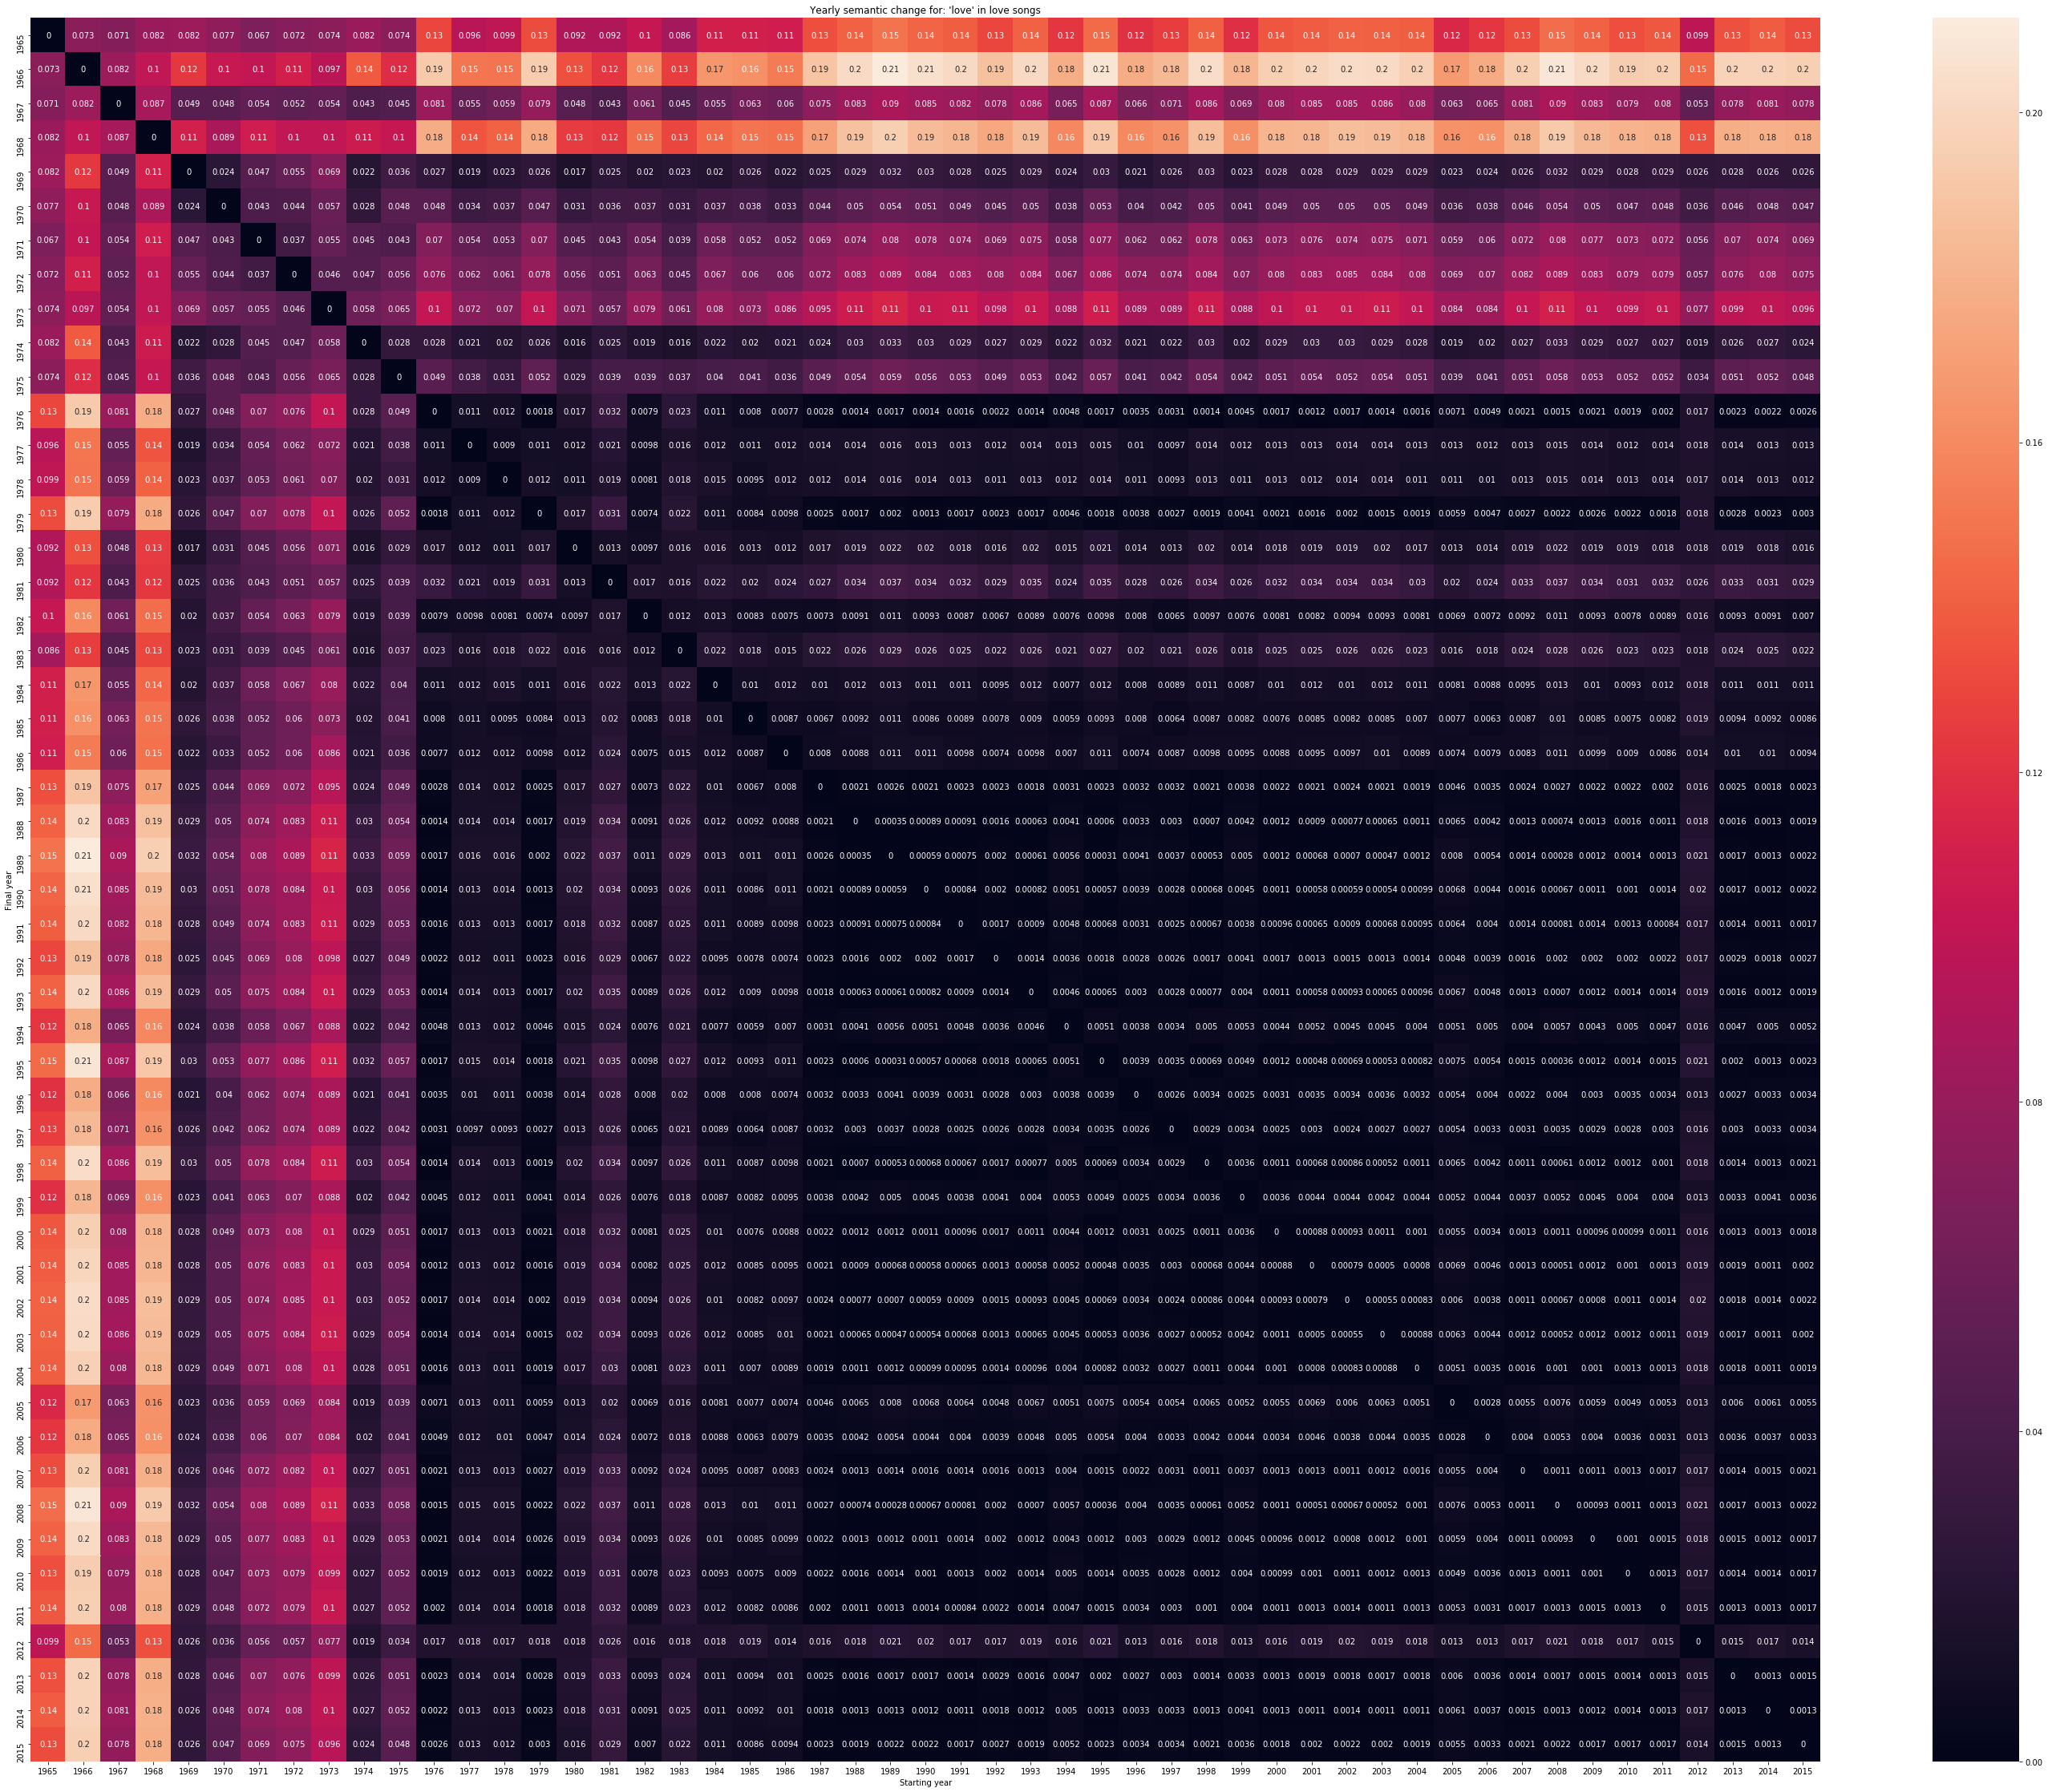

In [423]:
lovesong_semantic_df = getDivergenceDF('love', lovesong_comparedEmbeddings)
fig, ax = plt.subplots(figsize = (50,40))
sns.heatmap(lovesong_semantic_df, ax = ax, annot = True) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly semantic change for: '{}' in love songs".format('love'))
plt.savefig('Pictures_homicide_suicide/lovesong_semantic_change')
plt.show()

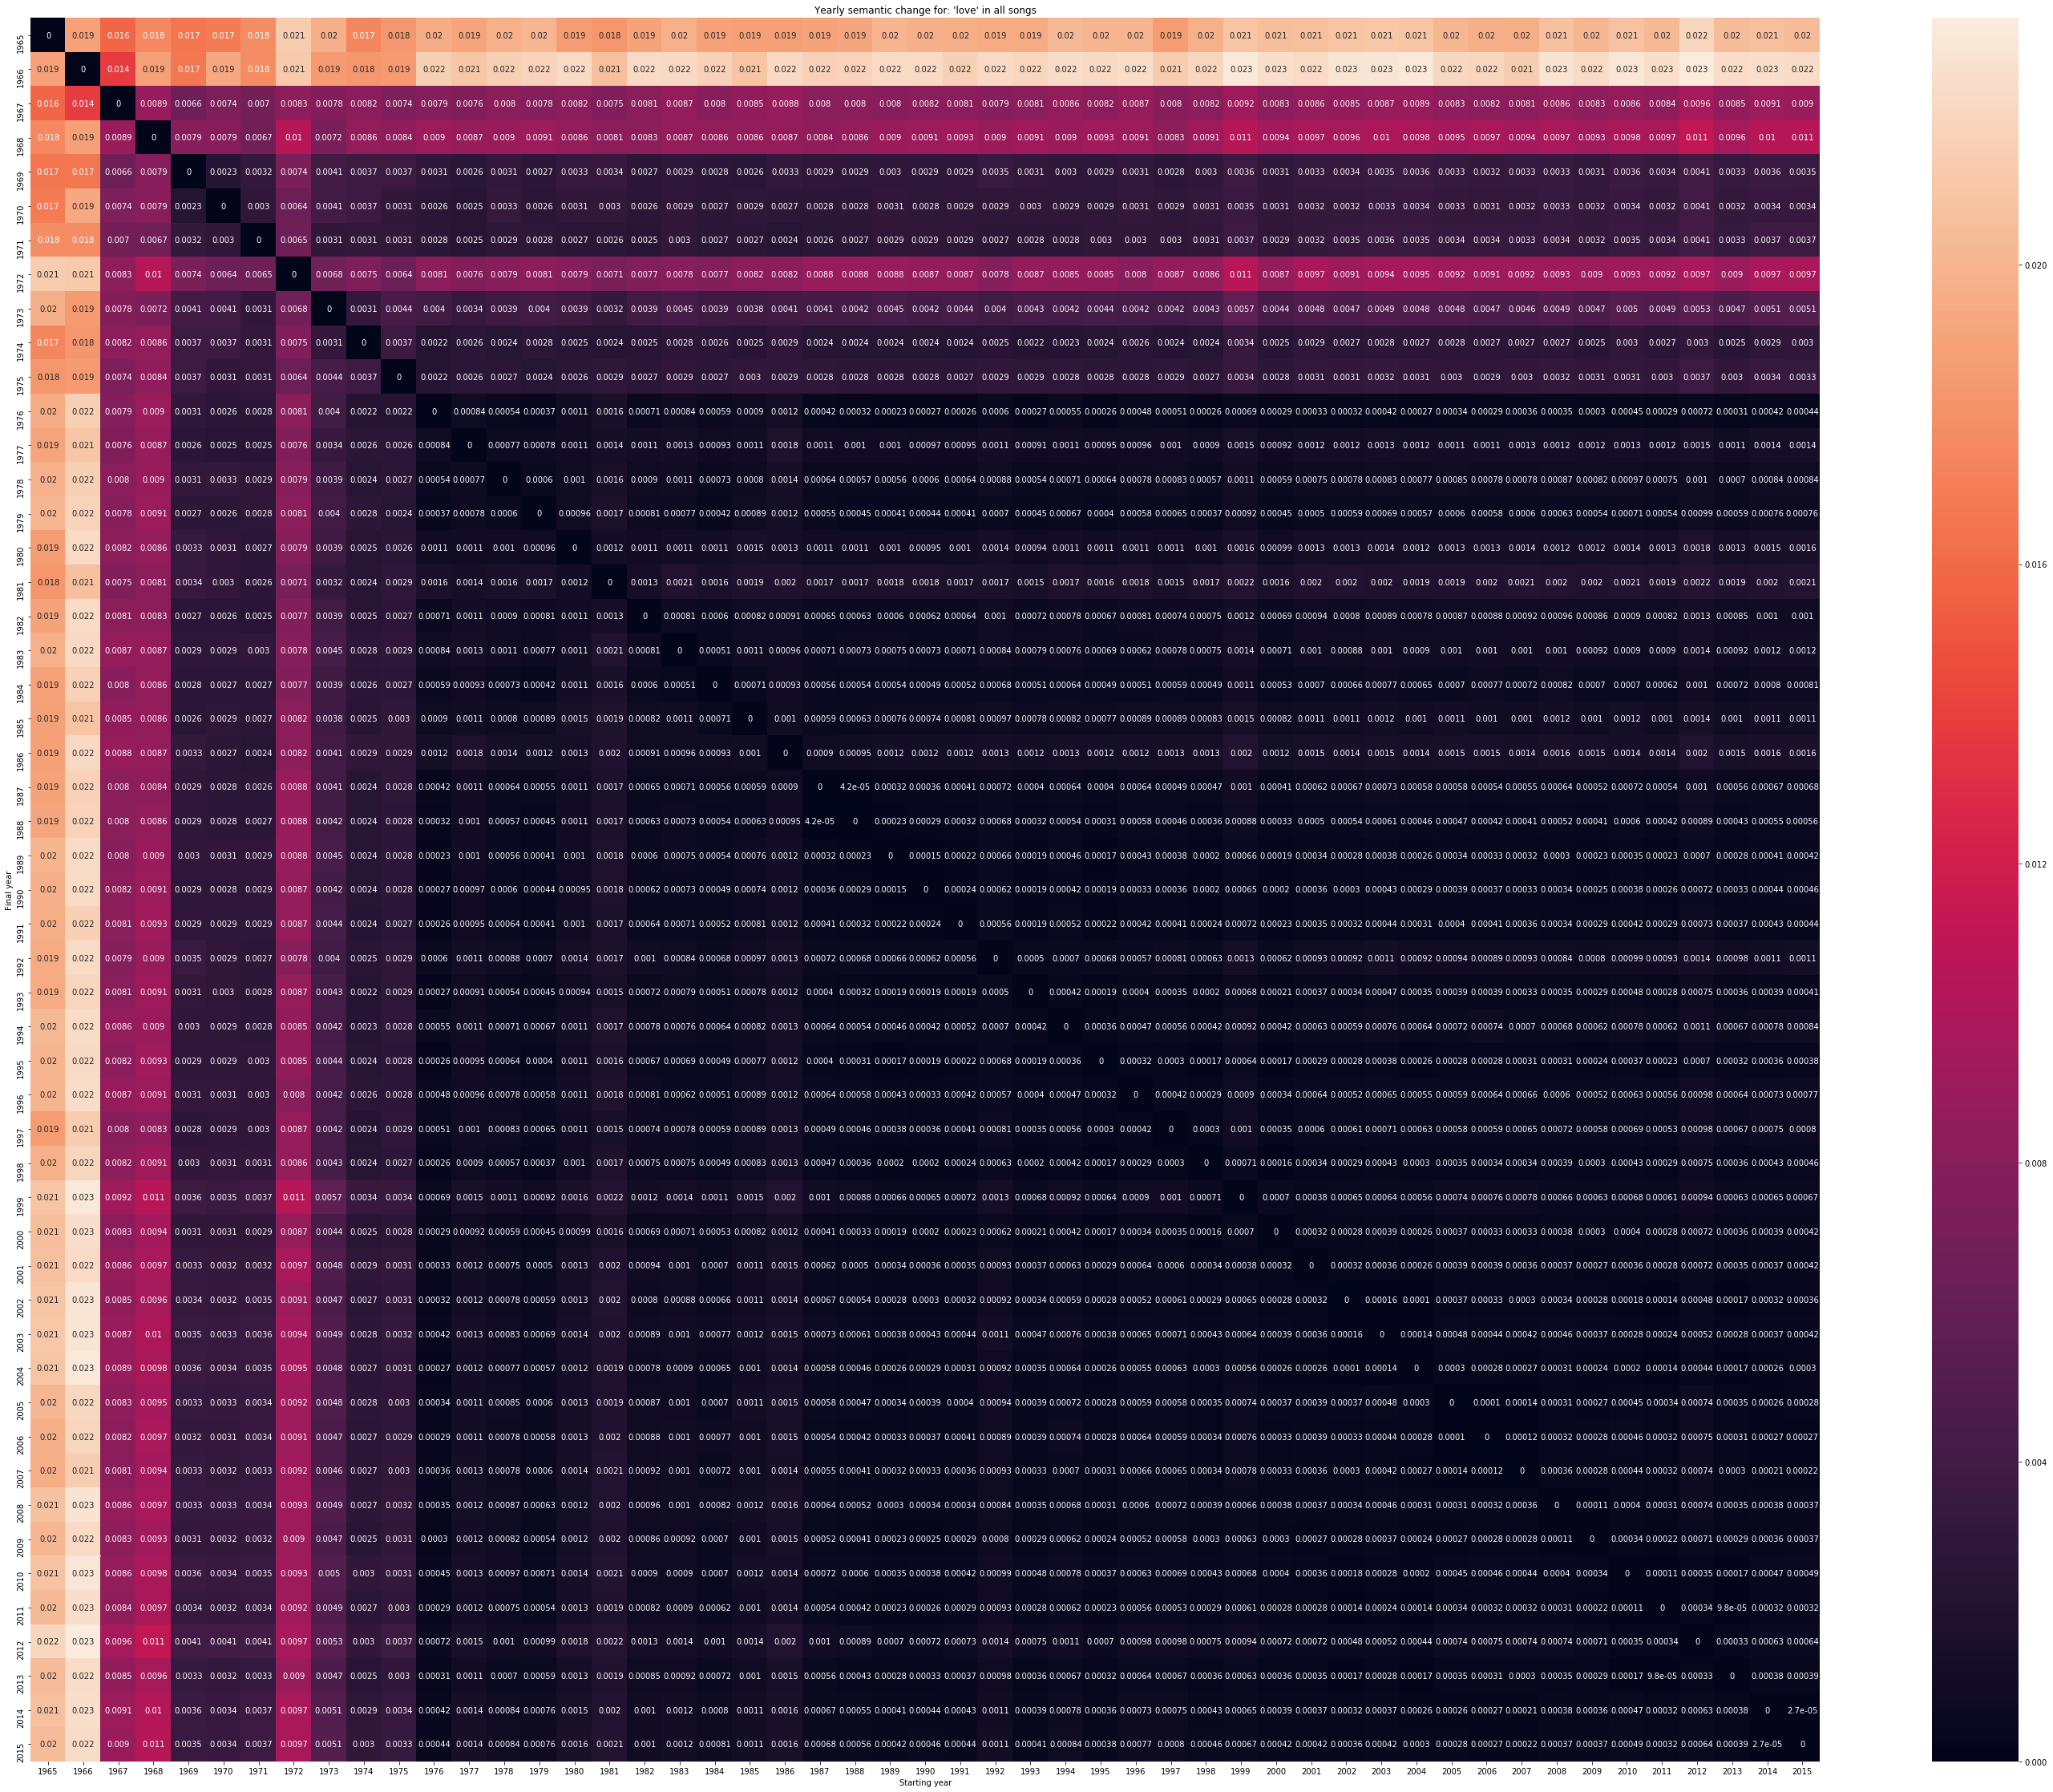

In [424]:
overall_semantic_df = getDivergenceDF('love', overall_comparedEmbeddings)
fig, ax = plt.subplots(figsize = (50,40))
sns.heatmap(overall_semantic_df, ax = ax, annot = True) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly semantic change for: '{}' in all songs".format('love'))
plt.savefig('Pictures_homicide_suicide/overall_semantic_change')
plt.show()

In [77]:
ghtm_matrix = []
for x in st_ghtm['GHTM']:
    row = []
    for y in st_ghtm['GHTM']:
        row.append(abs(x-y))
    ghtm_matrix.append(row)

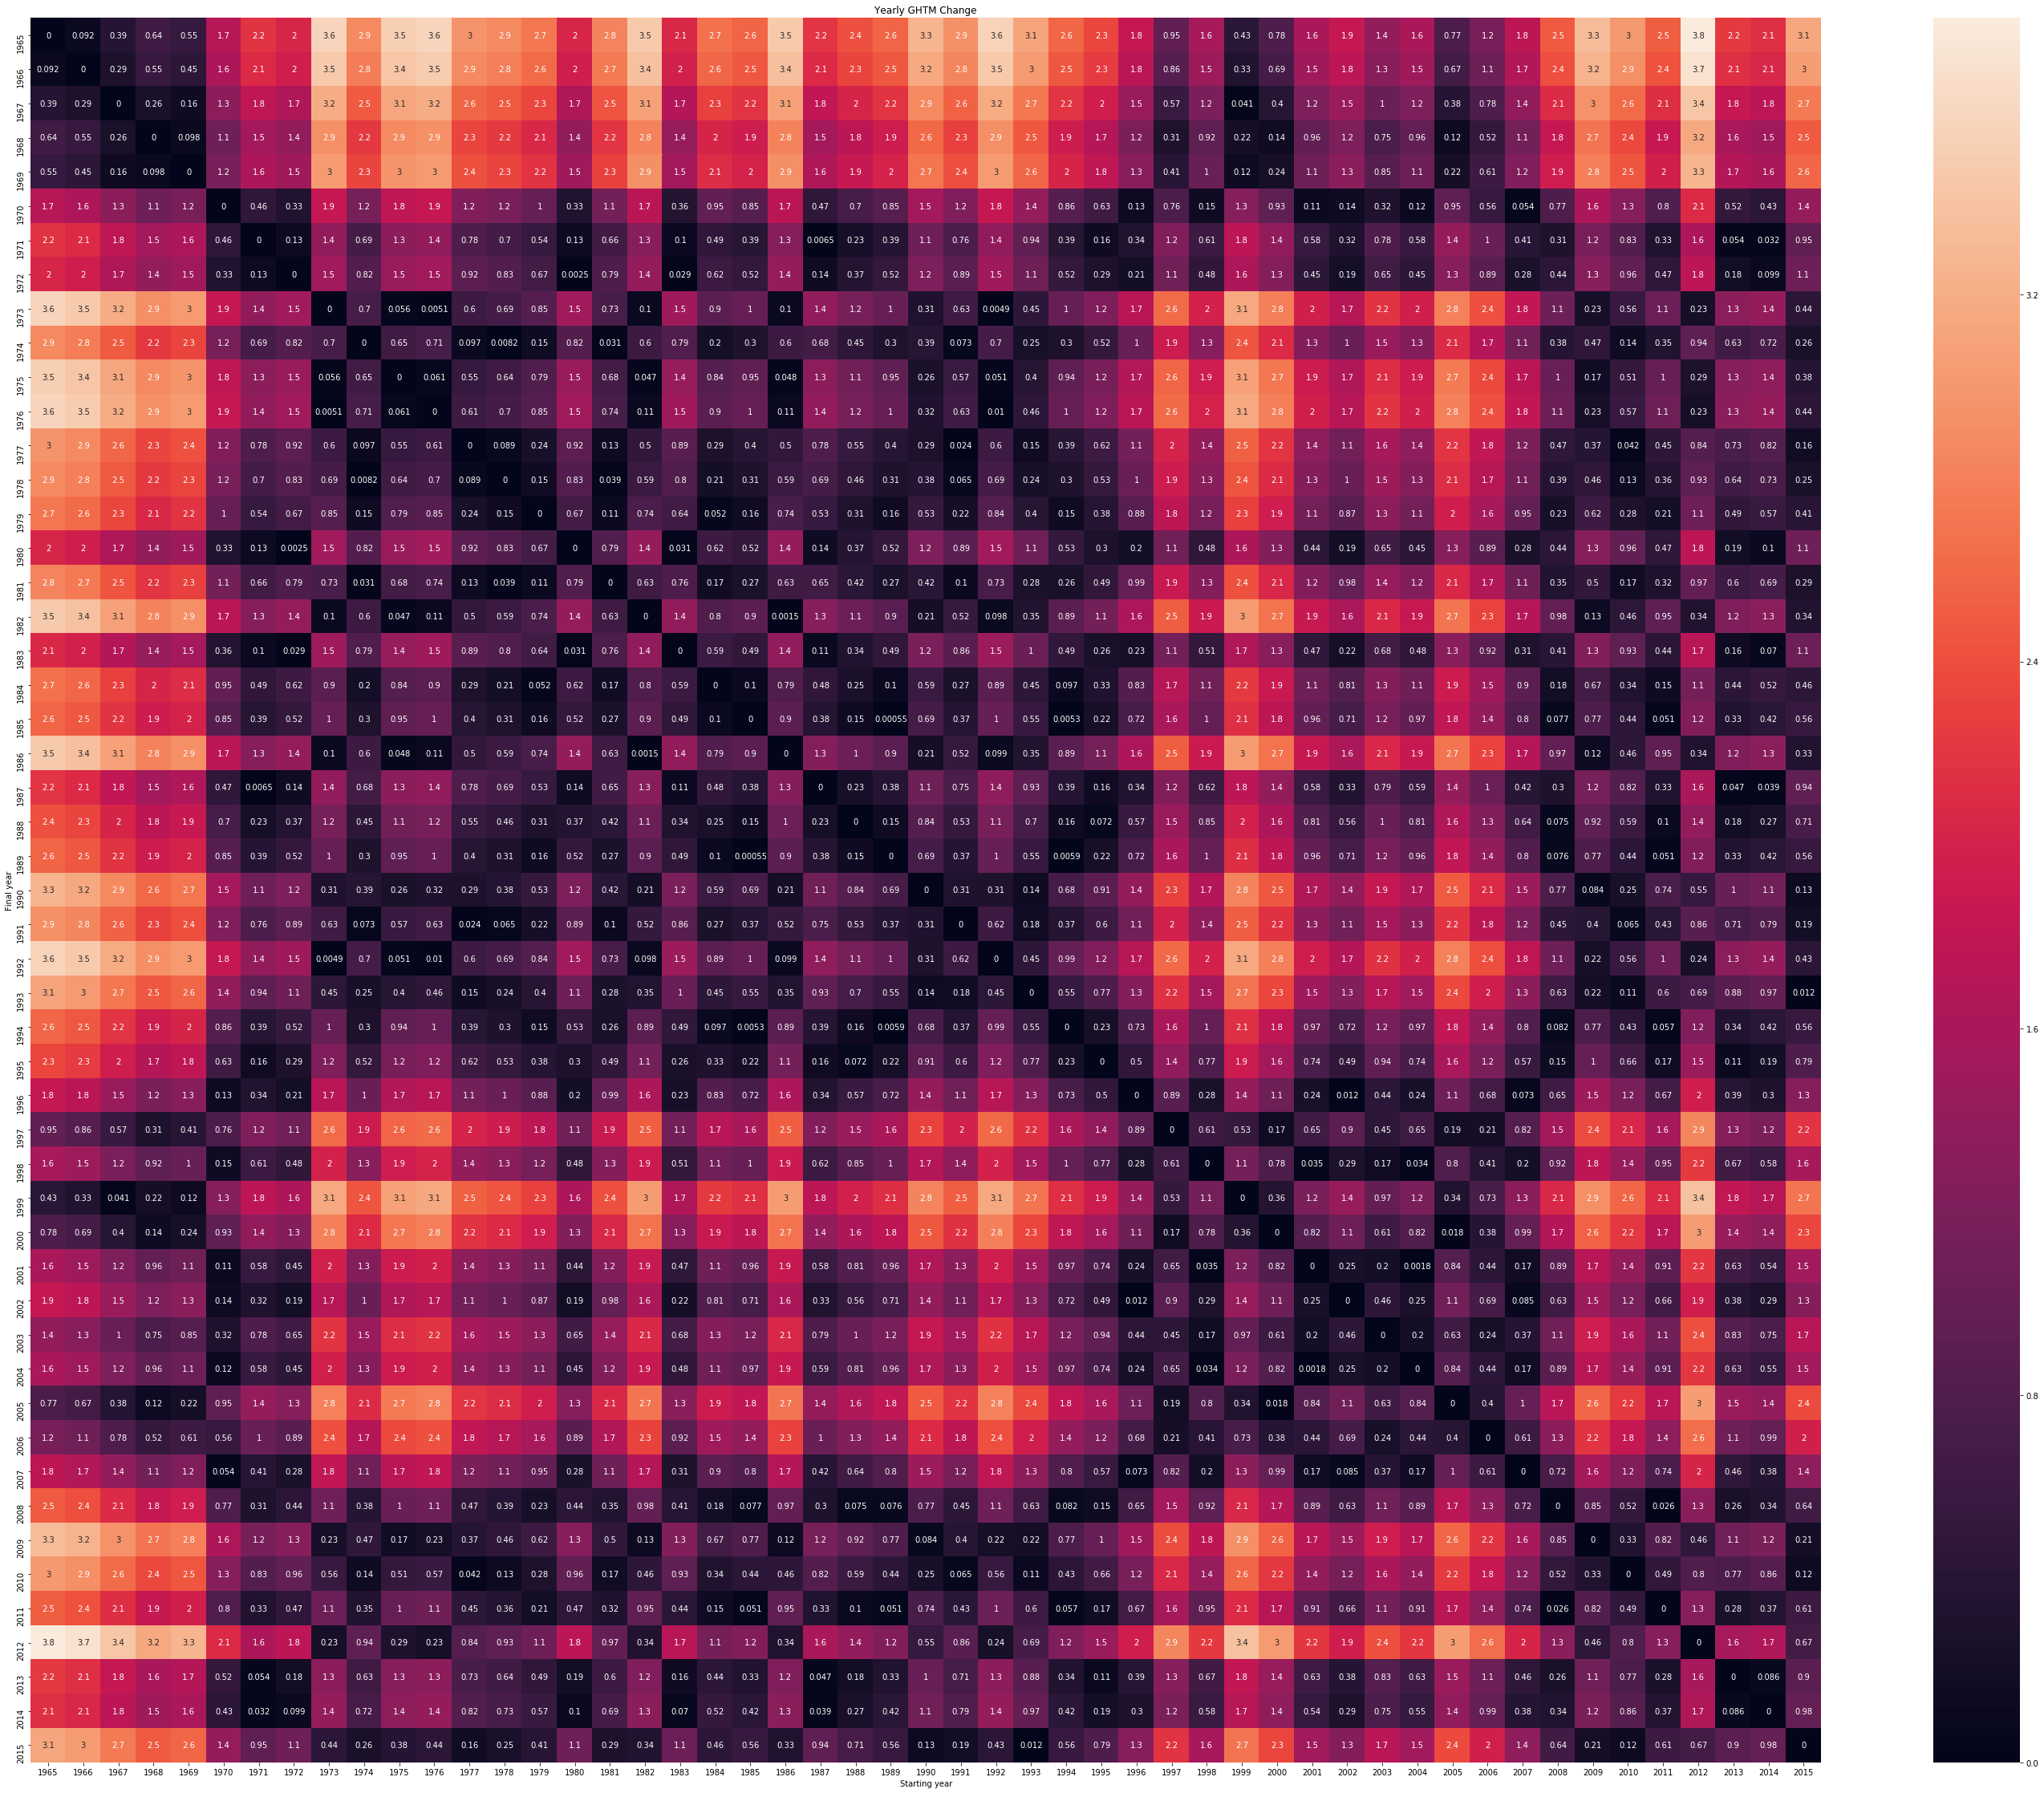

In [425]:
fig, ax = plt.subplots(figsize = (50,40))
sns.heatmap(np.array(ghtm_matrix), ax = ax, annot = True,
            xticklabels = st_ghtm['year'], yticklabels = st_ghtm['year']) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly GHTM Change")
plt.savefig('Pictures_homicide_suicide/yearly_ghtm_change')
plt.show()

In [79]:
indice_value_matrix = st_ghtm.drop(columns=['year','GHTM']).values
socioeconomic_matrix = []
for x in indice_value_matrix:
    row = []
    for y in indice_value_matrix:
        row.append(cosine(x,y))
    socioeconomic_matrix.append(row)

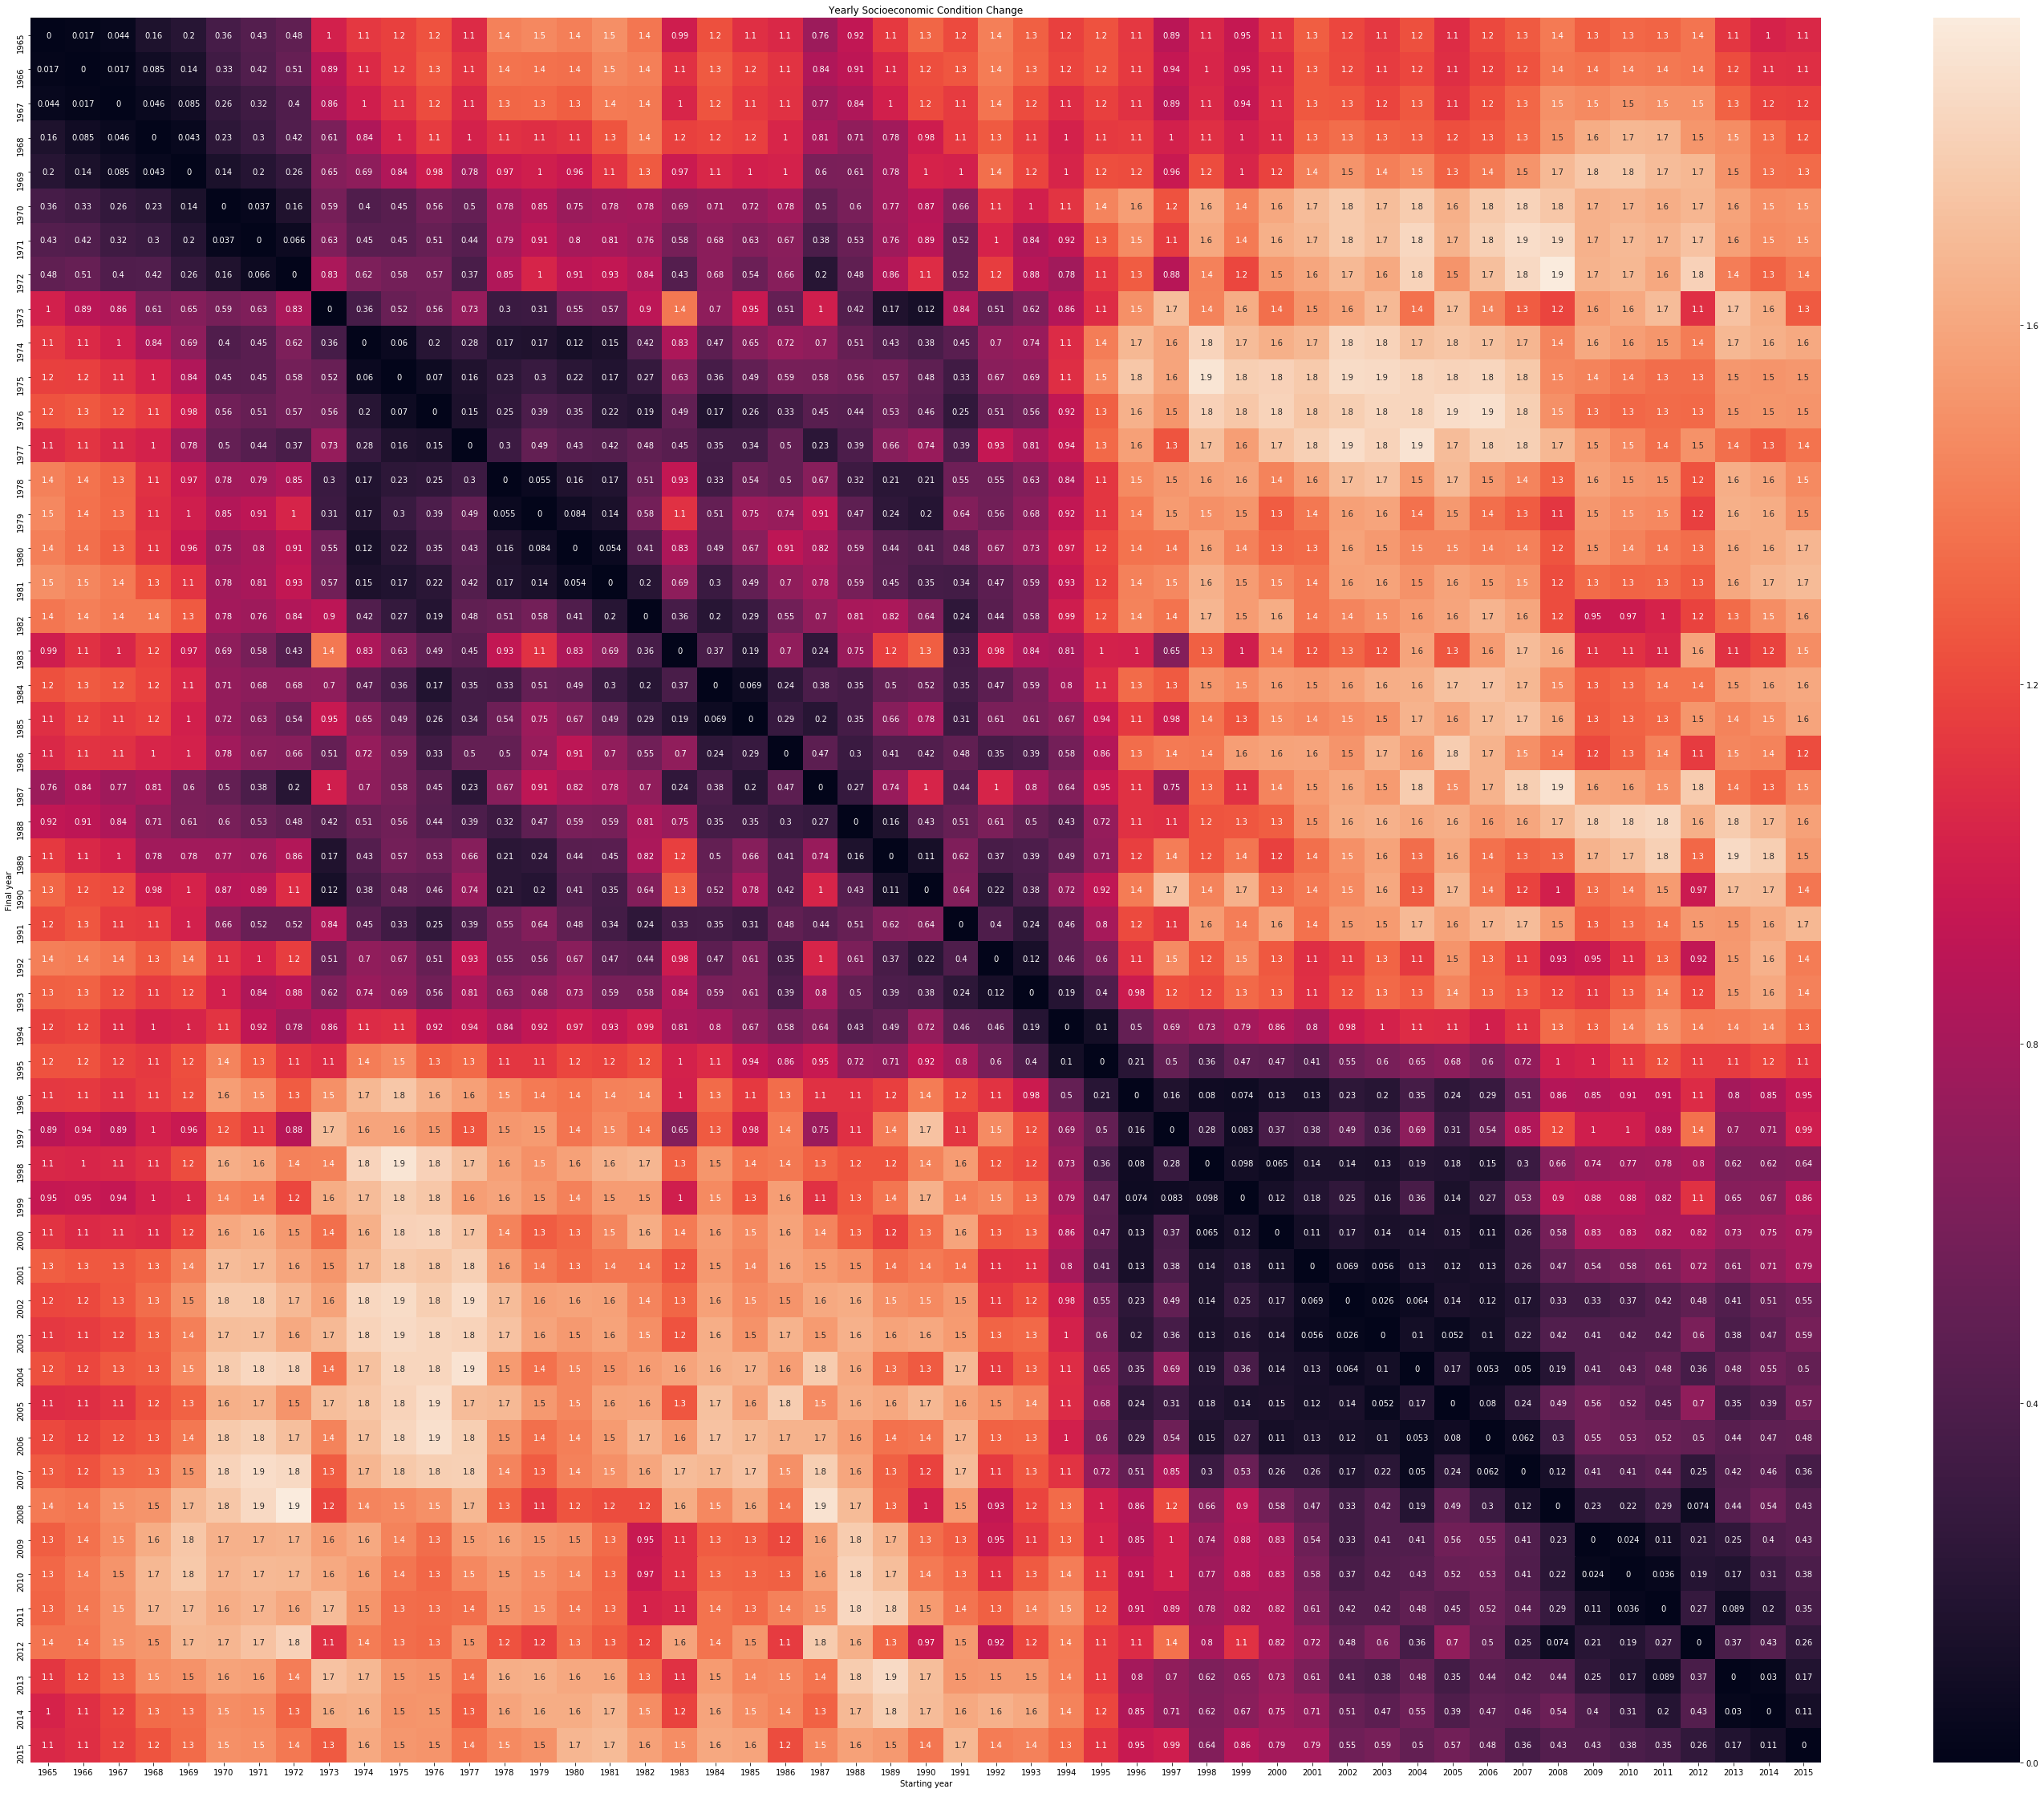

In [80]:
fig, ax = plt.subplots(figsize = (50,40))
sns.heatmap(np.array(socioeconomic_matrix), ax = ax, annot = True,
            xticklabels = st_ghtm['year'], yticklabels = st_ghtm['year']) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_title("Yearly Socioeconomic Condition Change")
plt.savefig('Pictures_homicide_suicide/yearly_socioeconomic_change')
plt.show()

### Correlation Test

In [123]:
def matrix_to_elements(M):
    n = M.shape[0]
    elements = []
    for x in range(n):
        for y in range(x+1,n):
            elements.append(M[x][y])
    #standardized = StandardScaler().fit_transform(np.array(elements).reshape(-1,1)).reshape(-1,)
    return elements#standardized

In [426]:
sp.stats.pearsonr(matrix_to_elements(lovesong_semantic_df.values),matrix_to_elements(overall_semantic_df.values))

(0.8684057256749527, 0.0)

### GHTM Correlations

In [427]:
sp.stats.pearsonr(matrix_to_elements(lovesong_semantic_df.values),matrix_to_elements(np.array(ghtm_matrix)))

(0.3478153847064288, 1.4529862732820892e-37)

In [428]:
sp.stats.pearsonr(matrix_to_elements(overall_semantic_df.values),matrix_to_elements(np.array(ghtm_matrix)))

(0.41562550830694434, 2.0265005820986343e-54)

In [429]:
sp.stats.pearsonr(matrix_to_elements(lovesong_semantic_df.values),matrix_to_elements(np.array(socioeconomic_matrix)))

(0.14532542007646868, 1.8706109647196548e-07)

In [430]:
sp.stats.pearsonr(matrix_to_elements(overall_semantic_df.values),matrix_to_elements(np.array(socioeconomic_matrix)))

(0.10826237141659453, 0.00010735494372776215)

### Socioeconomic Indices Correlations

In [431]:
indice_change_matrix = {}
indice_df = st_ghtm.drop(columns=['year'])
for c in indice_df.columns:
    matrix = []
    for x in indice_df[c]:
        row = []
        for y in indice_df[c]:
            row.append(abs(x-y))
        matrix.append(row)
    indice_change_matrix[c] = np.array(matrix)

In [432]:
for c in indice_df.columns:
    corr = sp.stats.pearsonr(matrix_to_elements(overall_semantic_df.values),matrix_to_elements(indice_change_matrix[c]))
    print('{}:{}'.format(c,corr))

unemployment rate:(0.1402790334011389, 4.932098112635973e-07)
disposable income change:(0.0888068255774988, 0.0015024960221214985)
CPI change:(-0.06333845990975907, 0.02371667137524966)
birth rate:(0.6991308763825596, 1.0746346333840838e-187)
death rate:(0.41426104303082695, 4.856014368245831e-54)
marriage rate:(-0.03809150769439817, 0.17405213883188553)
divorce rate:(0.4185263683274205, 3.1189103471488015e-55)
homicide rate:(-0.000290004018042086, 0.9917459850401509)
suicide rate:(-0.04725938527683223, 0.09164471138561392)
GHTM:(0.41562550830694434, 2.0265005820986343e-54)


In [131]:
for c in indice_df.columns:
    corr = sp.stats.pearsonr(matrix_to_elements(lovesong_semantic_df.values),matrix_to_elements(indice_change_matrix[c]))
    print('{}:{}'.format(c,corr))

unemployment rate:(0.13949310144761357, 5.7187487281166e-07)
disposable income change:(0.10940201374241357, 9.06457588296842e-05)
CPI change:(-0.05760978330392379, 0.03970822231061479)
birth rate:(0.6172989122743204, 8.782392581482286e-135)
death rate:(0.5111103917951259, 8.80384183516781e-86)
marriage rate:(0.018158629029310435, 0.5171077225642418)
divorce rate:(0.3492415516816606, 7.042181124843342e-38)
homicide rate:(-0.005842808976202285, 0.8348954528682941)
suicide rate:(-0.025529363112719534, 0.36238235264566293)
GHTM:(0.3475766958019493, 1.6396371178138707e-37)


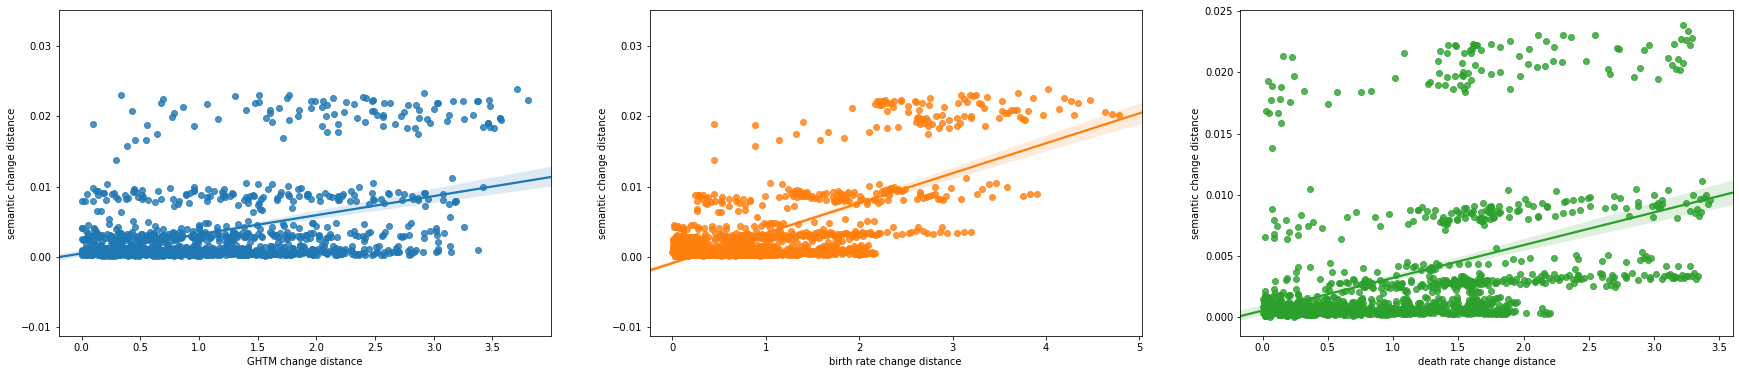

In [132]:
plt.rcParams['figure.figsize']=[30,6]
fig, axes = plt.subplots(1,3)
sns.regplot(matrix_to_elements(indice_change_matrix['GHTM']), matrix_to_elements(overall_semantic_df.values),ax=axes[0])
axes[0].set_xlabel('GHTM change distance')
axes[0].set_ylabel('semantic change distance')
sns.regplot(matrix_to_elements(indice_change_matrix['birth rate']), matrix_to_elements(overall_semantic_df.values), ax=axes[1])
axes[1].set_xlabel('birth rate change distance')
axes[1].set_ylabel('semantic change distance')
sns.regplot(matrix_to_elements(indice_change_matrix['death rate']), matrix_to_elements(overall_semantic_df.values), ax=axes[2])
axes[2].set_xlabel('death rate change distance')
axes[2].set_ylabel('semantic change distance')
plt.savefig('Pictures_homicide_suicide/love semantic changes vs three indices')
plt.show()

### closest words to love

In [291]:
def closest_words(embeddings, pos, n):
    closest_dict = {}
    for k in embeddings:
        top_100 = embeddings[k][0].most_similar(positive='love',topn=200)
        closest_dict[k] = []
        counter = 0
        for word,similarity in top_100:
            if counter < n:
                if word != 'love' and nlp(word)[0].pos_ in pos: # and nlp(word)[0].pos_ in pos 
                    closest_dict[k].append(word)
                    counter += 1
            else:
                break
    return closest_dict

### closest words

In [440]:
closest_word = closest_words(overall_comparedEmbeddings, ['VERB','NOUN'], 1)

In [441]:
threshold = 0.0
good_condition = []
bad_condition = []
for i in range(len(st_ghtm['year'])):
    if st_ghtm['GHTM'][i]>threshold:
        bad_condition += closest_word[st_ghtm['year'][i]]
    if st_ghtm['GHTM'][i]<threshold*(-1):
        good_condition += closest_word[st_ghtm['year'][i]]

In [442]:
good_word_counts = set([(w,good_condition.count(w)) for w in good_condition])
bad_word_counts = set([(w,bad_condition.count(w)) for w in bad_condition])
sorted_good_word_counts = sorted(good_word_counts,key=lambda x:x[1],reverse=True)
sorted_bad_word_counts = sorted(bad_word_counts,key=lambda x:x[1],reverse=True)

In [443]:
sorted_good_word_counts[:10]

[('know', 3),
 ('girl', 2),
 ('go', 2),
 ('let', 2),
 ('baby', 2),
 ('boy', 1),
 ('feel', 1),
 ('pop', 1),
 ('cry', 1),
 ('time', 1)]

In [444]:
sorted_bad_word_counts[:10]

[('way', 4),
 ('go', 3),
 ('come', 3),
 ('want', 3),
 ('let', 2),
 ('tell', 2),
 ('day', 1),
 ('eye', 1),
 ('luck', 1),
 ('know', 1)]

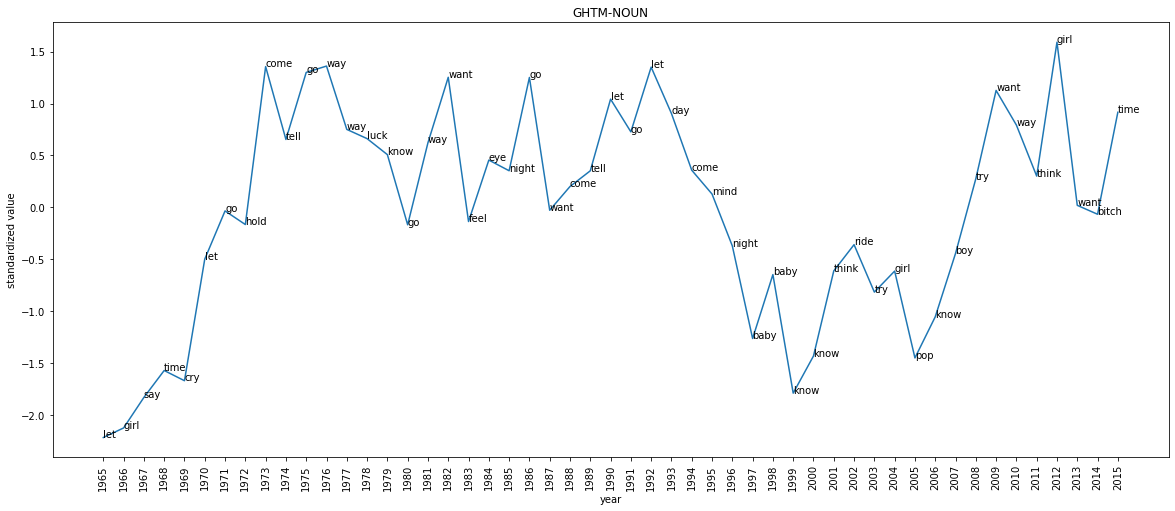

In [445]:
plt.rcParams['figure.figsize']=[20,8]

plt.plot(st_ghtm['year'], st_ghtm['GHTM'], label='GHTM')
for i in range(len(st_ghtm['year'])):
    x,y = (st_ghtm['year'][i],st_ghtm['GHTM'][i])
    #plt.annotate(closest_word[x][0], (x,y-0.1))
    plt.annotate(closest_word[x][0], (x,y))
    #plt.annotate(closest_word[x][2], (x,y+0.1))
plt.xlabel('year')
plt.xticks(st_ghtm['year'],rotation='vertical')
plt.ylabel('standardized value')
plt.title('GHTM-NOUN')
#plt.savefig('Pictures_homicide_suicide/Word Trend vs GHTM')
plt.show()

### tendency of romance

In [585]:
romance_words = ['boy','girl','kiss','honey','baby','adore','sweet','lover','romance','romantic']

In [603]:
def romance_distance(embeddings):
    words = set(romance_words) & set(embeddings.wv.vocab.keys())
    results = embeddings.wv.distances('love', words)
    print(results)
    return np.mean(results)

In [604]:
romance_distances = list(map(romance_distance, overall_rawEmbeddings.values()))

[0.06798649 0.05260175 0.08907223 0.08253074]
[0.0460791  0.19067824 0.10661829 0.04880208]
[0.03292084 0.06211776 0.10287344 0.03259236]
[0.05246681 0.10372001 0.02743596 0.05914414]
[0.01196295 0.09397274 0.00917959 0.01436502]
[0.01402611 0.02329755 0.05762661 0.01434869]
[0.01311231 0.01167148 0.01361716 0.01680553]
[0.02105099 0.03516531 0.05709213 0.02921551]
[0.01925176 0.01201981 0.01802653 0.01948661]
[0.01463968 0.01056737 0.05789983 0.00790882]
[0.01012981 0.01151073 0.04836321 0.01520091]
[0.00054395 0.00062841 0.0034734  0.00080311]
[0.00589883 0.00482297 0.00851738 0.00448805]
[0.00277781 0.01043081 0.00210071 0.00320935]
[0.00263834 0.00277066 0.01149678 0.00192142]
[0.00510097 0.01359224 0.0318163  0.00439918]
[0.00532746 0.01304334 0.00964469 0.00842053]
[0.00389957 0.01952571 0.00488436 0.00300992]
[0.00327909 0.00716233 0.01345718 0.00692999]
[0.00141931 0.00244004 0.02626657 0.00275898]
[0.00187951 0.00309849 0.01153982 0.00379008]
[0.00378209 0.00502354 0.0088625  

In [605]:
st_romance_distances = StandardScaler().fit_transform(np.array(romance_distances).reshape(-1,1)).reshape(51,)

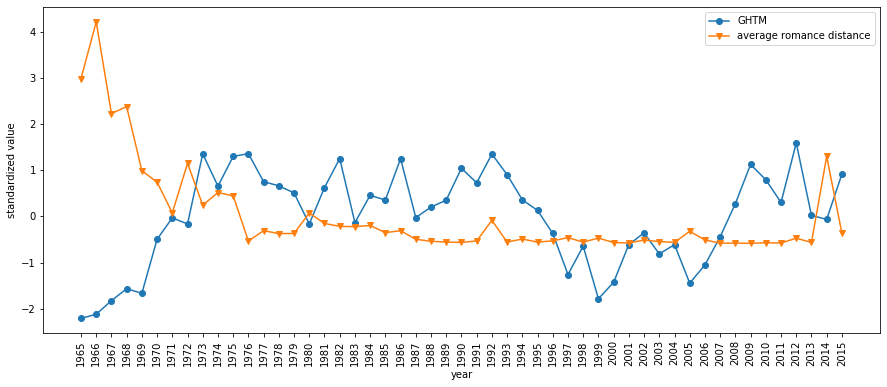

In [672]:
plt.rcParams['figure.figsize']=[15,6]
plt.plot(st_ghtm['year'], st_ghtm['GHTM'], marker='o', label='GHTM')
plt.plot(st_ghtm['year'], st_romance_distances, marker='v', label='average romance distance')
plt.xticks(st_ghtm['year'], rotation='vertical')
plt.xlabel('year')
plt.ylabel('standardized value')
plt.legend()
plt.savefig('Pictures_homicide_suicide/average romance distance vs GHTM-time series')
plt.show()

In [607]:
romance_distances_corr = {}
for x in st_ghtm.columns:
    if x!= 'year':
        romance_distances_corr[x] = sp.stats.pearsonr(st_ghtm[x], st_romance_distances)
romance_distances_corr

{'unemployment rate': (-0.3963205521803681, 0.003988779394692381),
 'disposable income change': (0.32666926508368344, 0.0193024190000228),
 'CPI change': (0.026915361661099275, 0.8512821054745903),
 'birth rate': (0.7344685942472732, 8.552057464264484e-10),
 'death rate': (0.647183416853937, 2.868124026412716e-07),
 'marriage rate': (0.289883133409785, 0.03907529704384615),
 'divorce rate': (-0.5516387128645927, 2.7196400384290408e-05),
 'homicide rate': (0.022167434519885912, 0.8772932327241523),
 'suicide rate': (0.3671473467300602, 0.008044121157417946),
 'GHTM': (-0.5081297682801413, 0.00014090718732772667)}

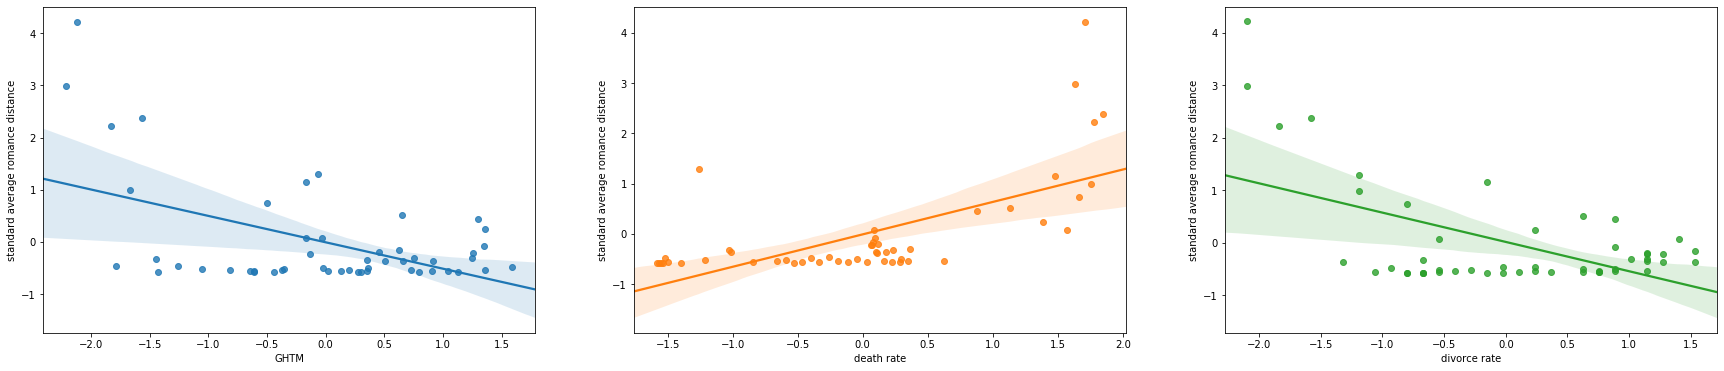

In [650]:
plt.rcParams['figure.figsize']=[30,6]
fig, axes = plt.subplots(1,3)
sns.regplot(st_ghtm['GHTM'],st_romance_distances,ax=axes[0])
axes[0].set_ylabel('standard average romance distance')
sns.regplot(st_ghtm['death rate'],st_romance_distances,ax=axes[1])
axes[1].set_ylabel('standard average romance distance')
sns.regplot(st_ghtm['divorce rate'],st_romance_distances,ax=axes[2])
axes[2].set_ylabel('standard average romance distance')
plt.savefig('Pictures_homicide_suicide/average_romance_distance vs three indices')
plt.show()